In [2]:
import os

import analysis_plotting_helper_functions as helper
import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [3]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7"]
continuous_colors = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", 
                     "#e4bcad", "#df979e", "#d7658b", "#c80064"]

In [4]:
cohort = 'cohort_2'
to_analyze = 'full_clean_analyzed'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2/full_clean_analyzed


# Session based plotting

## load session log

In [12]:
log_1 = os.path.join(data_folder, '509_training_sessions.csv')
training_session_log_1 = pd.read_csv(log_1, index_col=0)
log_2 = os.path.join(data_folder, '510_training_sessions.csv')
training_session_log_2 = pd.read_csv(log_2, index_col=0)
training_session_log = pd.concat([training_session_log_1, training_session_log_2])
training_session_log = training_session_log.reset_index(drop=True)

make mouse list

In [13]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ014', 'RZ015', 'RZ016', 'RZ017']


re-calculate days in training

In [14]:
for mouse in mouse_list:
    total_days = sum(training_session_log.mouse == mouse)
    training_session_log.loc[training_session_log.mouse == mouse, 'days'] = list(range(total_days))
    training_session_log['days'] = training_session_log['days'].astype(int)

## Plot type of trials per session

load analyzed all trials

In [7]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    session_performance = helper.get_session_performance(all_trials)
    training_session_log.loc[training_session_log.dir == dir_name, 
                             ['miss_trials', 'good_trials']] = session_performance

In [8]:
trial_type_df = training_session_log[['mouse', 'days', 'num_trials', 'miss_trials', 'good_trials']]
trial_type_df_copy = trial_type_df.copy()
trial_type_df_copy['p_miss'] = trial_type_df_copy.miss_trials/trial_type_df_copy.num_trials
trial_type_df_copy['p_good'] = trial_type_df_copy.good_trials/trial_type_df_copy.num_trials
trial_type_df_copy['p_enl'] = 1 - trial_type_df_copy.p_good - trial_type_df_copy.p_miss

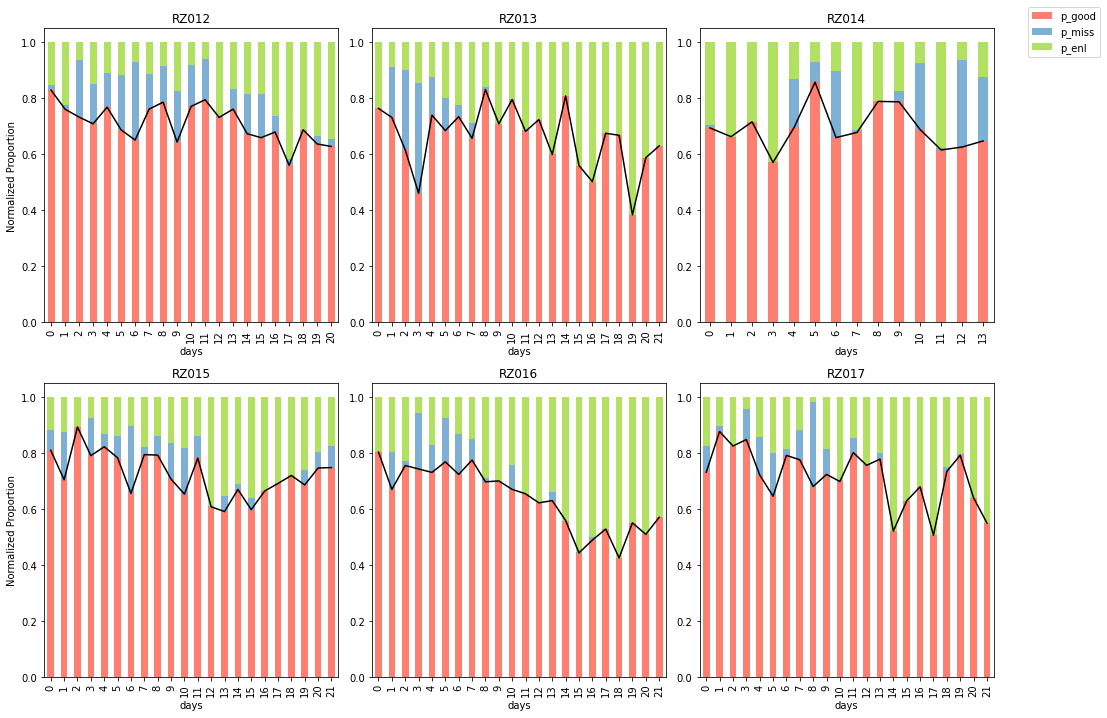

In [9]:
# ploting the proportion of good trials, miss trials, and enl trials per session
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df_copy.loc[trial_type_df_copy.mouse == mouse]
    to_plot = session_mouse.loc[:, ['days', 'p_good', 'p_miss', 'p_enl']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='days', stacked=True, color=colors[0:3], ax=ax, legend=None)
    ax.set_title(mouse)
    if i == 0 or i == 3:
        ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.days, to_plot.p_good, color='k', linewidth=1.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.savefig('engagement_plots.png', bbox_inches='tight')
plt.show()

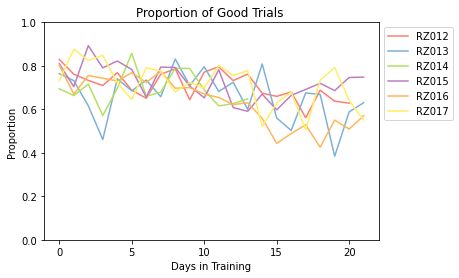

In [10]:
# plot percent good trials in session. each mouse is a line
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df_copy.loc[trial_type_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.p_good, color=colors[i], label=mouse)
plt.title('Proportion of Good Trials ')
plt.ylabel('Proportion')
plt.xlabel('Days in Training')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 22])
plt.ylim([0, 1])
fig.savefig('%_good_trials.png', bbox_inches='tight')

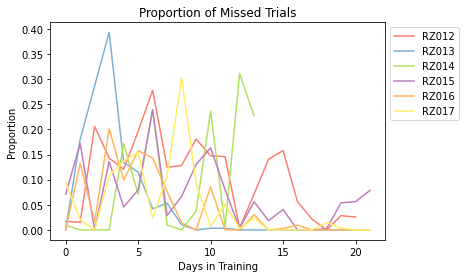

In [11]:
# plot percent missed trials in session. each mouse is a line
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df_copy.loc[trial_type_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.p_miss, color=colors[i], label=mouse)
plt.title('Proportion of Missed Trials')
plt.xlabel('Days in Training')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 21])
# plt.ylim([0, 0.2])
fig.savefig('%_missed_trials.png', bbox_inches='tight')

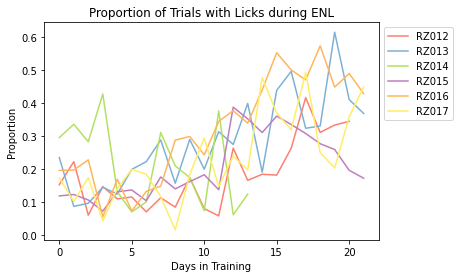

In [12]:
# plot percent missed trials in session. each mouse is a line
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df_copy.loc[trial_type_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.p_enl, color=colors[i], label=mouse)
plt.title('Proportion of Trials with Licks during ENL')
plt.xlabel('Days in Training')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1, 1.0), loc="upper left")
# plt.xlim([0, 18])
# plt.ylim([0, 0.2])
fig.savefig('%_enl_trials.png', bbox_inches='tight')

## Plot mistakes per session

In [13]:
mistake_df = training_session_log[['mouse', 'days', 'dir']]

In [14]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    session_mistakes = helper.get_session_mistakes(all_trials)
    mistake_df.loc[mistake_df.dir == dir_name, 
                             ['num_enl_repeats_mean', 'num_enl_repeats_median', 
                              'num_enl_repeats_stdev']] = session_mistakes

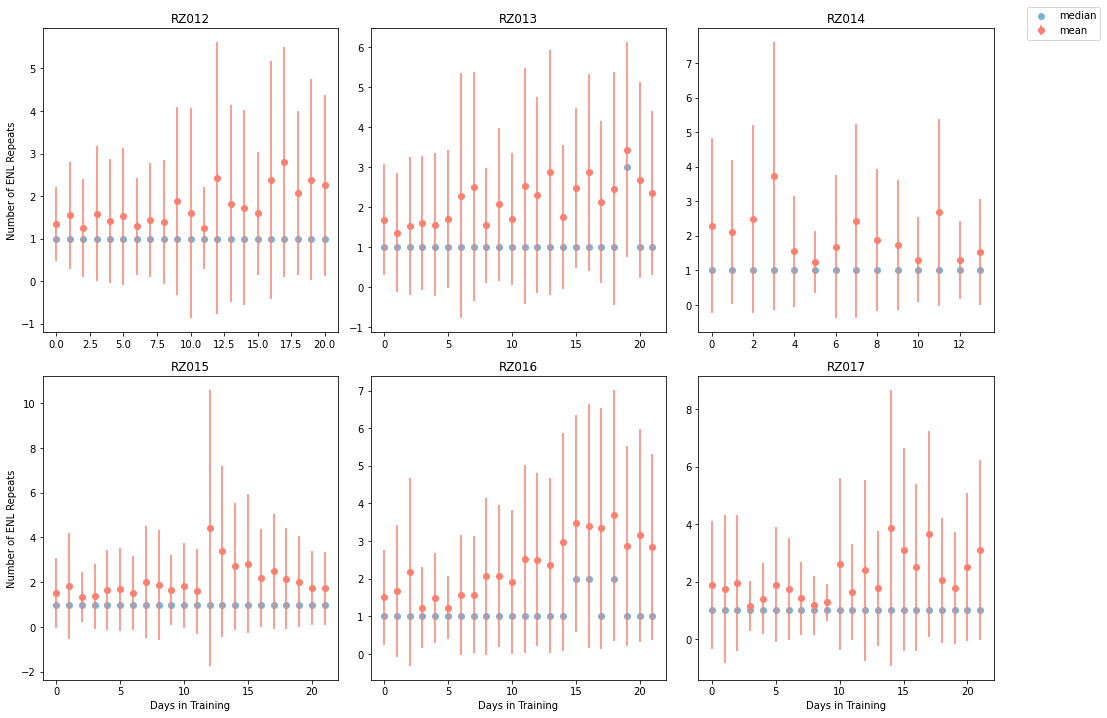

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = mistake_df.loc[mistake_df.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.num_enl_repeats_mean, session_mouse.num_enl_repeats_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.num_enl_repeats_median, color=colors[1], label='median')
    ax.set_title(mouse)
    if i > 2:
        ax.set_xlabel('Days in Training')
    if i == 0 or i == 3:
        ax.set_ylabel('Number of ENL Repeats')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig('enl_repeats_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

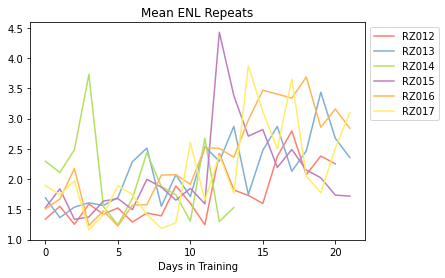

In [16]:
# plot percent mean bg repeats in session for all mice. each mouse is a line
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = mistake_df.loc[mistake_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.num_enl_repeats_mean, color=colors[i], label=mouse)
# plt.xlim([0, 21])
plt.title('Mean ENL Repeats')
plt.xlabel('Days in Training')
# plt.ylabel('Number of Mean ENL Repeats')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.savefig(f'enl_repeats_mean', bbox_inches='tight')

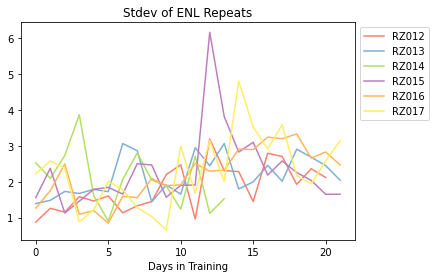

In [17]:
# plot percent stdev bg repeats in session for all mice. each mouse is a line
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = mistake_df.loc[mistake_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.num_enl_repeats_stdev, color=colors[i], label=mouse)
# plt.xlim([0, 18])
plt.xlabel('Days in Training')
plt.title('Stdev of ENL Repeats')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.savefig(f'enl_repeats_stdev', bbox_inches='tight')

## Plot rewards per session

In [15]:
training_session_log['reward_rate'] = training_session_log.rewards/training_session_log.time

In [22]:
training_session_log['reward_per_trial'] = training_session_log.rewards/training_session_log.num_trials

In [19]:
training_session_log

index        date  mouse                        dir  \
0       12  2023-04-25  RZ012  2023-04-25_11-00-06_RZ012   
1       34  2023-04-25  RZ013  2023-04-25_11-25-20_RZ013   
2       75  2023-04-25  RZ014  2023-04-25_11-43-17_RZ014   
3        2  2023-04-25  RZ015  2023-04-25_12-10-41_RZ015   
4       32  2023-04-25  RZ016  2023-04-25_12-38-31_RZ016   
..     ...         ...    ...                        ...   
118     53  2023-05-26  RZ012  2023-05-26_10-16-19_RZ012   
119     30  2023-05-26  RZ013  2023-05-26_10-17-59_RZ013   
120     25  2023-05-26  RZ015  2023-05-26_10-59-50_RZ015   
121     34  2023-05-26  RZ017  2023-05-26_11-03-33_RZ017   
122     56  2023-05-26  RZ016  2023-05-26_11-20-10_RZ016   

                               filename training  num_blocks  num_trials  \
0    data_RZ012_2023-04-25_11-00-06.txt  regular         3.0       176.0   
1    data_RZ013_2023-04-25_11-25-20.txt  regular         2.0       106.0   
2    data_RZ014_2023-04-25_11-43-17.txt  regular         3.0       216.0   
3    data_RZ015_2023-04-25_12-10-41.txt  regular         3.0       184.0   
4    data_RZ016_2023-04-25_12-38-31.txt  regular         3.0       198.0   
..                                  ...      ...         ...         ...   
118  data_RZ012_2023-05-26_10-16-19.txt  regular         6.0       350.0   
119  data_RZ013_2023-05-26_10-17-59.txt  regular         7.0       414.0   
120  data_RZ015_2023-05-26_10-59-50.txt  regular         2.0       127.0   
121  data_RZ017_2023-05-26_11-03-33.txt  regular         7.0       418.0   
122  data_RZ016_2023-05-26_11-20-10.txt  regular         7.0       384.0   

     rewards     time  proper_end  days  reward_rate  reward_per_trial  
0     541.35  1314.41        True     0     0.411858          3.075852  
1     367.27   832.84       False     0     0.440985          3.464811  
2     458.45  1452.66        True     0     0.315593          2.122454  
3     645.04  1517.78        True     0     0.424989          3.505652  
4     528.83  1380.37        True     0     0.383107          2.670859  
..       ...      ...         ...   ...          ...               ...  
118   711.11  2353.39        True    20     0.302164          2.031743  
119   737.53  2610.83        True    21     0.282489          1.781473  
120   366.31  1025.13        True    21     0.357330          2.884331  
121  1005.08  2911.00        True    21     0.345270          2.404498  
122   473.69  2339.40        True    21     0.202484          1.233568  

[123 rows x 14 columns]

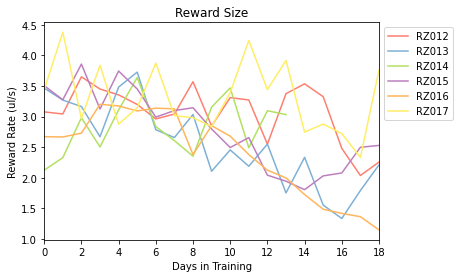

In [21]:
# plot the change in reward size per trial over days. each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.reward_per_trial, color=colors[i], label=mouse)
plt.title('Reward Size')
plt.xlabel('Days in Training')
plt.ylabel('Reward Rate (ul/s)')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([0, 18])
# plt.ylim([0, 0.4])
fig.savefig('reward_size.png', bbox_inches='tight')

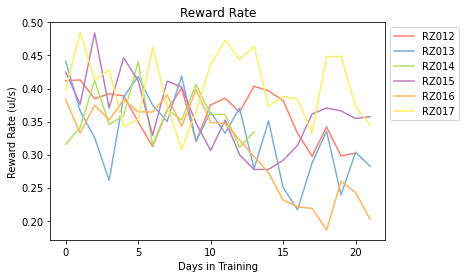

In [16]:
# plot the change in reward rate over days. each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.reward_rate, color=colors[i], label=mouse)
plt.title('Reward Rate')
plt.xlabel('Days in Training')
plt.ylabel('Reward Rate (ul/s)')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 18])
# plt.ylim([0, 0.4])
fig.savefig('reward_rate.png', bbox_inches='tight')

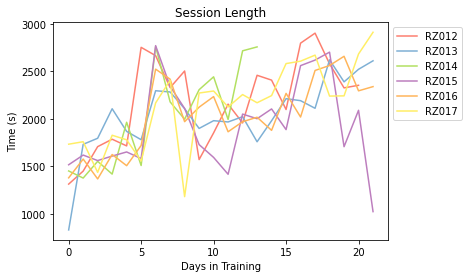

In [20]:
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.time, color=colors[i], label=mouse)
plt.title('Session Length')
plt.xlabel('Days in Training')
plt.ylabel('Time (s)')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 18])
# plt.ylim([0, 0.4])
fig.savefig('session_time.png', bbox_inches='tight')

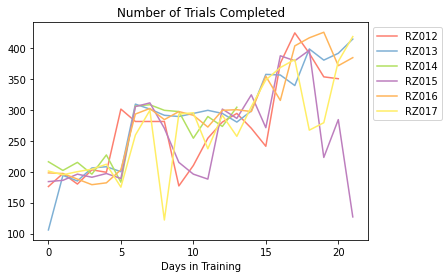

In [21]:
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.num_trials, color=colors[i], label=mouse)
plt.title('Number of Trials Completed')
plt.xlabel('Days in Training')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 18])
# plt.ylim([0, 0.4])
fig.savefig('number_of_trials.png', bbox_inches='tight')

## Plot time wait behavior

In [22]:
wait_df = training_session_log[['mouse', 'days', 'dir']]

In [23]:
def select_good_trials(all_trials):
    good_trials = all_trials.loc[(all_trials['miss_trial'] == False) & (all_trials['enl_repeats'] == 1)]
    return good_trials

In [24]:
all_trials

session_trial_num  block_trial_num  block_num    start_time  \
0                  0.0              0.0        0.0  1.685114e+09   
1                  1.0              1.0        0.0  1.685114e+09   
2                  2.0              2.0        0.0  1.685114e+09   
3                  3.0              3.0        0.0  1.685114e+09   
4                  4.0              4.0        0.0  1.685114e+09   
..                 ...              ...        ...           ...   
380              380.0             38.0        7.0  1.685117e+09   
381              381.0             39.0        7.0  1.685117e+09   
382              382.0             40.0        7.0  1.685117e+09   
383              383.0             41.0        7.0  1.685117e+09   
384              384.0             42.0        7.0  1.685117e+09   

         end_time  bg_drawn blk_type  bg_length  enl_repeats  miss_trial  \
0    1.685114e+09       3.3        l   4.319198          6.0       False   
1    1.685114e+09       3.0        l   3.208298          2.0       False   
2    1.685114e+09       2.7        l   2.707178          1.0       False   
3    1.685114e+09       2.5        l   2.506994          1.0       False   
4    1.685114e+09       3.3        l   5.394804          9.0       False   
..            ...       ...      ...        ...          ...         ...   
380  1.685117e+09       1.1        s   1.106616          1.0       False   
381  1.685117e+09       1.1        s   1.106700          1.0       False   
382  1.685117e+09       1.0        s   1.006634          1.0       False   
383  1.685117e+09       1.2        s   1.206645          1.0       False   
384  1.685117e+09       1.0        s   1.107156          2.0       False   

     time_waited    reward  num_consumption_lick  
0       1.139796  2.034109                  12.0  
1       2.494073  3.887123                  15.0  
2       1.084948  1.946873                  13.0  
3       0.256841  0.500748                   9.0  
4       1.117552  1.998844                  10.0  
..           ...       ...                   ...  
380     0.172508  0.339196                   6.0  
381     0.546264  1.034525                   8.0  
382     0.827609  1.523822                  10.0  
383     0.457050  0.873338                   9.0  
384     0.405983  0.779741                  10.0  

[385 rows x 13 columns]

In [25]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    tw_diff_blk = helper.get_session_tw_difference(all_trials)
    wait_df.loc[wait_df.dir == dir_name, 
                             ['tw_l_mean', 'tw_l_median', 'tw_l_stdev',
                              'tw_s_mean', 'tw_s_median','tw_s_stdev']] = tw_diff_blk
    
    good_trials = select_good_trials(all_trials)
    tw_diff_blk_gd = helper.get_session_tw_difference(good_trials)
    wait_df.loc[wait_df.dir == dir_name, 
                             ['tw_l_mean_g', 'tw_l_median_g', 'tw_l_stdev_g',
                              'tw_s_mean_g', 'tw_s_median_g','tw_s_stdev_g']] = tw_diff_blk_gd

wait_df_copy = wait_df.copy()
wait_df_copy['tw_diff'] = wait_df_copy['tw_l_mean'] - wait_df_copy['tw_s_mean']
wait_df_copy['tw_diff_g'] = wait_df_copy['tw_l_mean_g'] - wait_df_copy['tw_s_mean_g']

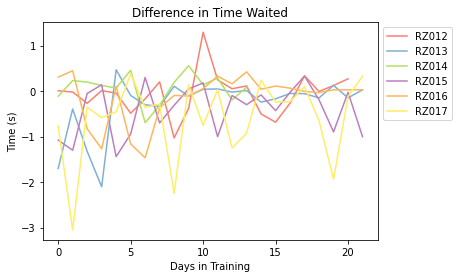

In [26]:
# plot the change in difference in time waited bewteen long and short blocks over days. 
# each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.tw_diff, color=colors[i], label=mouse)

plt.xlabel('Days in Training')
plt.ylabel('Time (s)')
plt.title('Difference in Time Waited')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
fig.savefig('tw_diff.png', bbox_inches='tight')

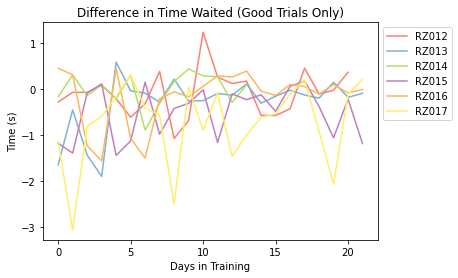

In [27]:
# plot the change in difference in time waited bewteen long and short blocks over days.
# good trials only 
# each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.tw_diff_g, color=colors[i], label=mouse)

plt.xlabel('Days in Training')
plt.ylabel('Time (s)')
plt.title('Difference in Time Waited (Good Trials Only)')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 11])
# plt.ylim([0, 0.4])
fig.savefig('tw_diff_g.png', bbox_inches='tight')

In [28]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    session_time_waited = helper.get_session_time_waited(all_trials)
    wait_df_copy.loc[wait_df_copy.dir == dir_name, 
                             ['tw_mean', 'tw_median', 'tw_stdev']] = session_time_waited

In [29]:
all_trials

session_trial_num  block_trial_num  block_num    start_time  \
0                  0.0              0.0        0.0  1.685114e+09   
1                  1.0              1.0        0.0  1.685114e+09   
2                  2.0              2.0        0.0  1.685114e+09   
3                  3.0              3.0        0.0  1.685114e+09   
4                  4.0              4.0        0.0  1.685114e+09   
..                 ...              ...        ...           ...   
380              380.0             38.0        7.0  1.685117e+09   
381              381.0             39.0        7.0  1.685117e+09   
382              382.0             40.0        7.0  1.685117e+09   
383              383.0             41.0        7.0  1.685117e+09   
384              384.0             42.0        7.0  1.685117e+09   

         end_time  bg_drawn blk_type  bg_length  enl_repeats  miss_trial  \
0    1.685114e+09       3.3        l   4.319198          6.0       False   
1    1.685114e+09       3.0        l   3.208298          2.0       False   
2    1.685114e+09       2.7        l   2.707178          1.0       False   
3    1.685114e+09       2.5        l   2.506994          1.0       False   
4    1.685114e+09       3.3        l   5.394804          9.0       False   
..            ...       ...      ...        ...          ...         ...   
380  1.685117e+09       1.1        s   1.106616          1.0       False   
381  1.685117e+09       1.1        s   1.106700          1.0       False   
382  1.685117e+09       1.0        s   1.006634          1.0       False   
383  1.685117e+09       1.2        s   1.206645          1.0       False   
384  1.685117e+09       1.0        s   1.107156          2.0       False   

     time_waited    reward  num_consumption_lick  
0       1.139796  2.034109                  12.0  
1       2.494073  3.887123                  15.0  
2       1.084948  1.946873                  13.0  
3       0.256841  0.500748                   9.0  
4       1.117552  1.998844                  10.0  
..           ...       ...                   ...  
380     0.172508  0.339196                   6.0  
381     0.546264  1.034525                   8.0  
382     0.827609  1.523822                  10.0  
383     0.457050  0.873338                   9.0  
384     0.405983  0.779741                  10.0  

[385 rows x 13 columns]

In [30]:
linear_fit_df = training_session_log[['mouse', 'days', 'dir']]

In [31]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    all_trials = all_trials[all_trials['time_waited'].notna()]
    fit_data = utils.linear_fit(all_trials, 'bg_length', 'time_waited')
    linear_fit_df.loc[linear_fit_df.dir == dir_name, 
                             ['slope', 'intercept', 'rsquared']] = fit_data

In [32]:
linear_fit_df

mouse  days                        dir     slope  intercept  rsquared
0    RZ012     0  2023-04-25_11-00-06_RZ012 -0.013987   2.265777  0.000058
1    RZ013     0  2023-04-25_11-25-20_RZ013 -0.787924   4.124185  0.279913
2    RZ014     0  2023-04-25_11-43-17_RZ014 -0.030917   1.372570  0.001213
3    RZ015     0  2023-04-25_12-10-41_RZ015 -0.428655   3.704267  0.047228
4    RZ016     0  2023-04-25_12-38-31_RZ016  0.097295   1.570563  0.004140
..     ...   ...                        ...       ...        ...       ...
118  RZ012    20  2023-05-26_10-16-19_RZ012  0.170042   0.903734  0.031739
119  RZ013    21  2023-05-26_10-17-59_RZ013  0.065848   0.877577  0.011010
120  RZ015    21  2023-05-26_10-59-50_RZ015 -0.343454   2.999231  0.039667
121  RZ017    21  2023-05-26_11-03-33_RZ017  0.077731   1.387208  0.004031
122  RZ016    21  2023-05-26_11-20-10_RZ016  0.009708   0.653023  0.000527

[123 rows x 6 columns]

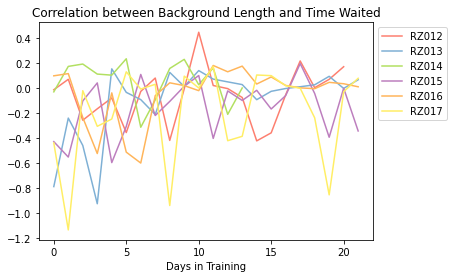

In [33]:
# plot the correlation between time in background and time waited
# each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = linear_fit_df.loc[linear_fit_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.slope, color=colors[i], label=mouse)

plt.xlabel('Days in Training')
# plt.ylabel('Time (s)')
plt.title('Correlation between Background Length and Time Waited')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 11])
# plt.ylim([0, 0.4])
fig.savefig('tb_tw_correlation.png', bbox_inches='tight')

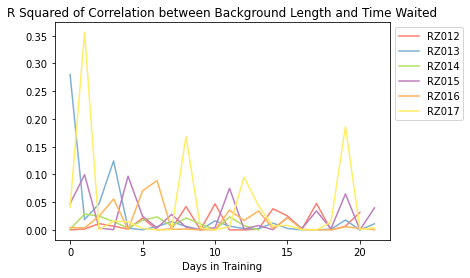

In [34]:
# plot the fit of the correlation between time in background and time waited
# each mouse is a line 
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = linear_fit_df.loc[linear_fit_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.rsquared, color=colors[i], 
             label=mouse)

plt.xlabel('Days in Training')
# plt.ylabel('Time (s)')
plt.title('R Squared of Correlation between Background Length and Time Waited')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 11])
# plt.ylim([0, 0.4])
fig.savefig('tb_tw_correlation_rsuqared.png', bbox_inches='tight')

In [35]:
linear_fit_df

mouse  days                        dir     slope  intercept  rsquared
0    RZ012     0  2023-04-25_11-00-06_RZ012 -0.013987   2.265777  0.000058
1    RZ013     0  2023-04-25_11-25-20_RZ013 -0.787924   4.124185  0.279913
2    RZ014     0  2023-04-25_11-43-17_RZ014 -0.030917   1.372570  0.001213
3    RZ015     0  2023-04-25_12-10-41_RZ015 -0.428655   3.704267  0.047228
4    RZ016     0  2023-04-25_12-38-31_RZ016  0.097295   1.570563  0.004140
..     ...   ...                        ...       ...        ...       ...
118  RZ012    20  2023-05-26_10-16-19_RZ012  0.170042   0.903734  0.031739
119  RZ013    21  2023-05-26_10-17-59_RZ013  0.065848   0.877577  0.011010
120  RZ015    21  2023-05-26_10-59-50_RZ015 -0.343454   2.999231  0.039667
121  RZ017    21  2023-05-26_11-03-33_RZ017  0.077731   1.387208  0.004031
122  RZ016    21  2023-05-26_11-20-10_RZ016  0.009708   0.653023  0.000527

[123 rows x 6 columns]

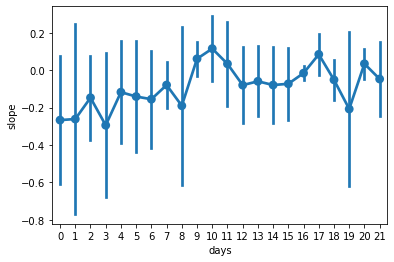

In [36]:
fig = plt.figure()
sns.pointplot(x="days", 
              y="slope", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig('tb_tw_correlation_all_mice.png', bbox_inches='tight')

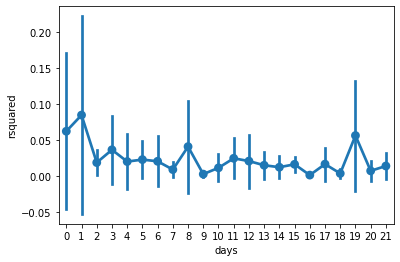

In [37]:
fig = plt.figure()
sns.pointplot(x="days", 
              y="rsquared", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig('tb_tw_rsquared_all_mice.png', bbox_inches='tight')

In [38]:
all_trials

session_trial_num  block_trial_num  block_num    start_time  \
0                  0.0              0.0        0.0  1.685114e+09   
1                  1.0              1.0        0.0  1.685114e+09   
2                  2.0              2.0        0.0  1.685114e+09   
3                  3.0              3.0        0.0  1.685114e+09   
4                  4.0              4.0        0.0  1.685114e+09   
..                 ...              ...        ...           ...   
380              380.0             38.0        7.0  1.685117e+09   
381              381.0             39.0        7.0  1.685117e+09   
382              382.0             40.0        7.0  1.685117e+09   
383              383.0             41.0        7.0  1.685117e+09   
384              384.0             42.0        7.0  1.685117e+09   

         end_time  bg_drawn blk_type  bg_length  enl_repeats  miss_trial  \
0    1.685114e+09       3.3        l   4.319198          6.0       False   
1    1.685114e+09       3.0        l   3.208298          2.0       False   
2    1.685114e+09       2.7        l   2.707178          1.0       False   
3    1.685114e+09       2.5        l   2.506994          1.0       False   
4    1.685114e+09       3.3        l   5.394804          9.0       False   
..            ...       ...      ...        ...          ...         ...   
380  1.685117e+09       1.1        s   1.106616          1.0       False   
381  1.685117e+09       1.1        s   1.106700          1.0       False   
382  1.685117e+09       1.0        s   1.006634          1.0       False   
383  1.685117e+09       1.2        s   1.206645          1.0       False   
384  1.685117e+09       1.0        s   1.107156          2.0       False   

     time_waited    reward  num_consumption_lick  
0       1.139796  2.034109                  12.0  
1       2.494073  3.887123                  15.0  
2       1.084948  1.946873                  13.0  
3       0.256841  0.500748                   9.0  
4       1.117552  1.998844                  10.0  
..           ...       ...                   ...  
380     0.172508  0.339196                   6.0  
381     0.546264  1.034525                   8.0  
382     0.827609  1.523822                  10.0  
383     0.457050  0.873338                   9.0  
384     0.405983  0.779741                  10.0  

[385 rows x 13 columns]

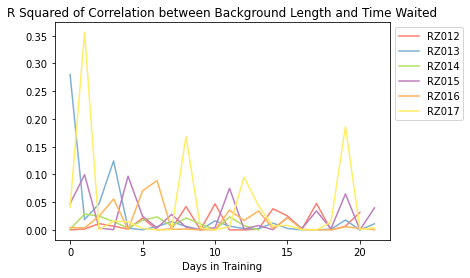

In [39]:
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = linear_fit_df.loc[linear_fit_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.rsquared, color=colors[i], 
             label=mouse)

plt.xlabel('Days in Training')
# plt.ylabel('Time (s)')
plt.title('R Squared of Correlation between Background Length and Time Waited')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 11])
# plt.ylim([0, 0.4])
fig.savefig('tb_tw_correlation_rsuqared.png', bbox_inches='tight')

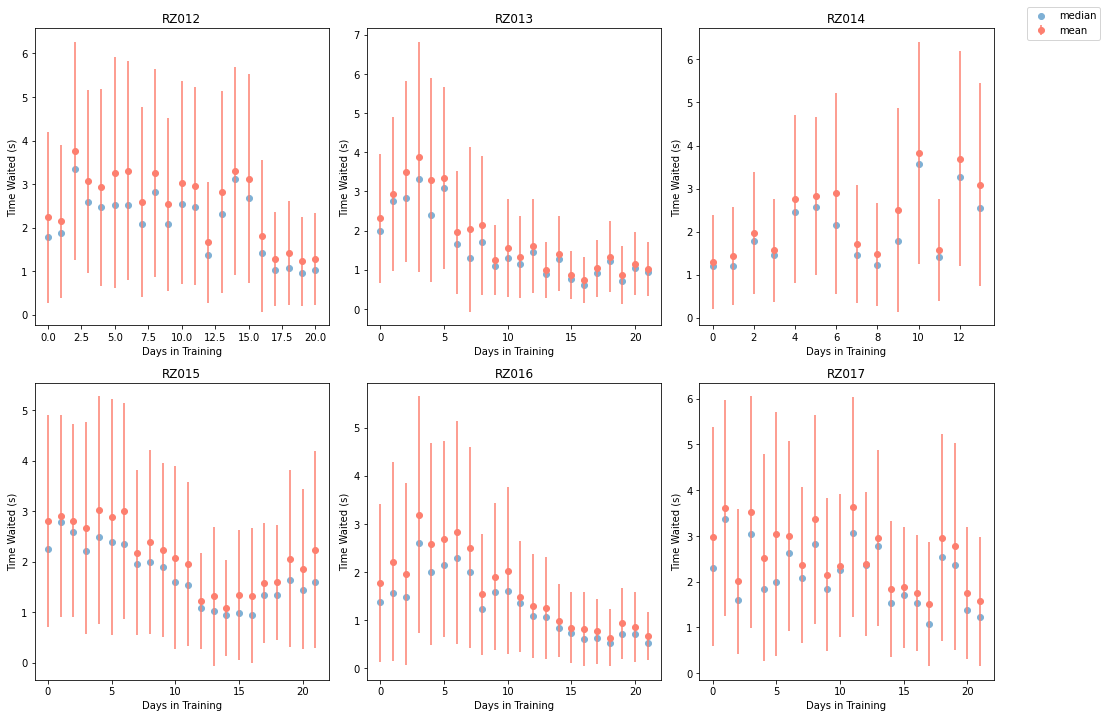

In [40]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_mean, session_mouse.tw_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig('tw_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

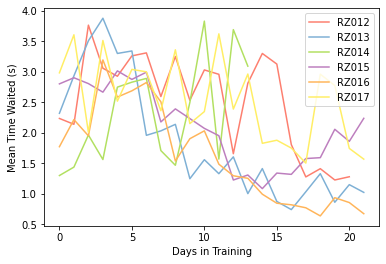

In [41]:
# plot percent mean time waited in session. each mouse is a line.
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.tw_mean, color=colors[i], label=mouse)

plt.xlabel('Days in Training')
plt.ylabel('Mean Time Waited (s)')
plt.legend(loc='upper right')
plt.savefig(f'tw_all_mice', bbox_inches='tight')

In [44]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    good_trials = select_good_trials(all_trials)
    session_time_waited = helper.get_session_time_waited(good_trials)
    wait_df_copy.loc[wait_df_copy.dir == dir_name, 
                     ['tw_good_mean', 'tw_good_median', 'tw_good_stdev']] = session_time_waited

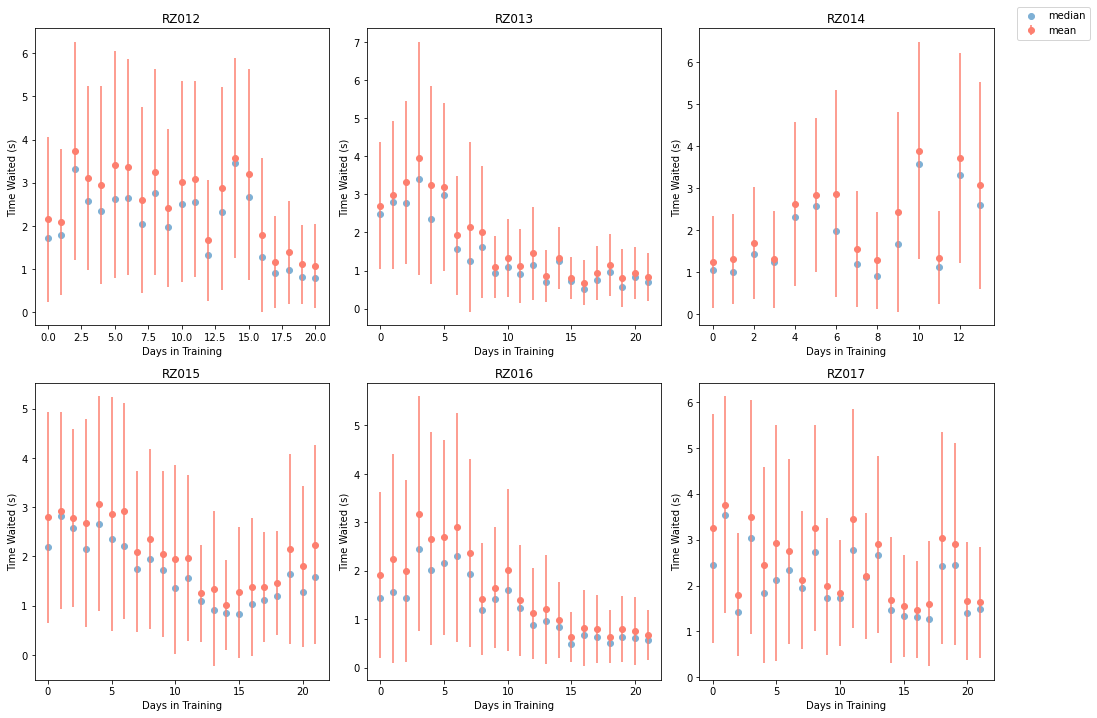

In [45]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_good_mean, session_mouse.tw_good_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_good_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.09, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig('tw_good_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

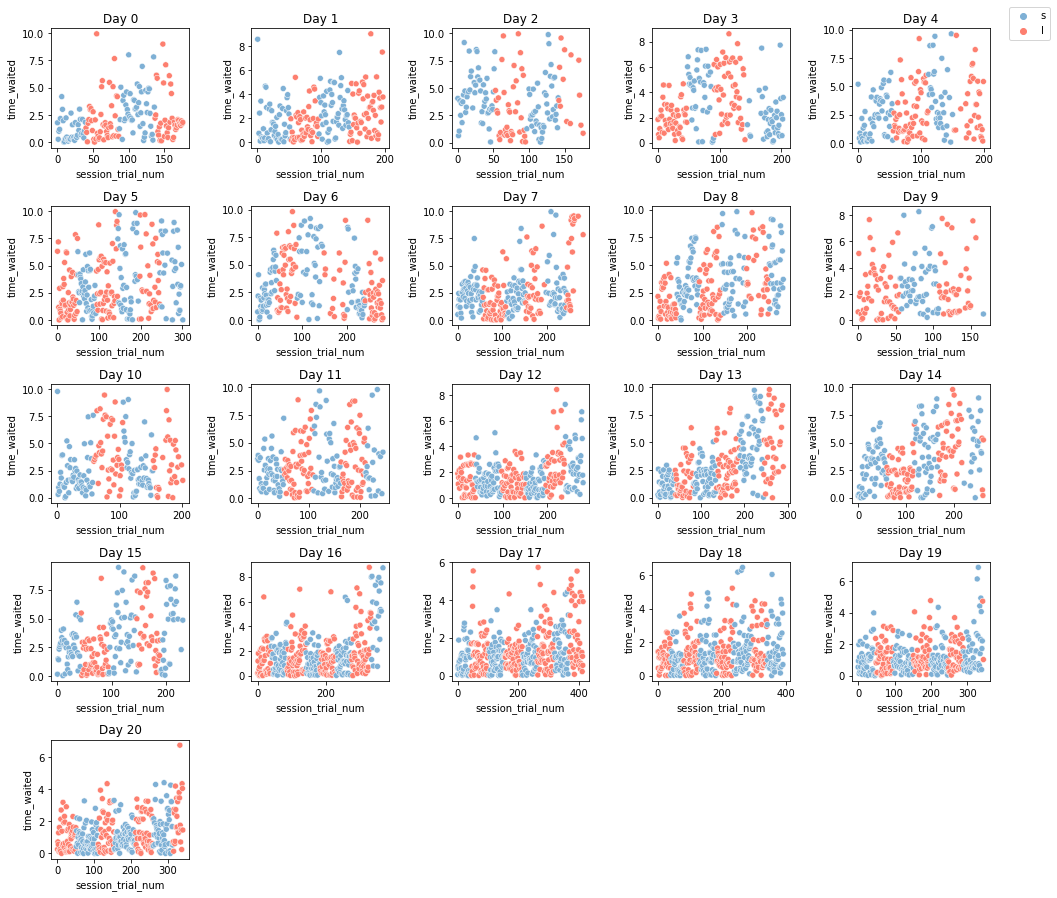

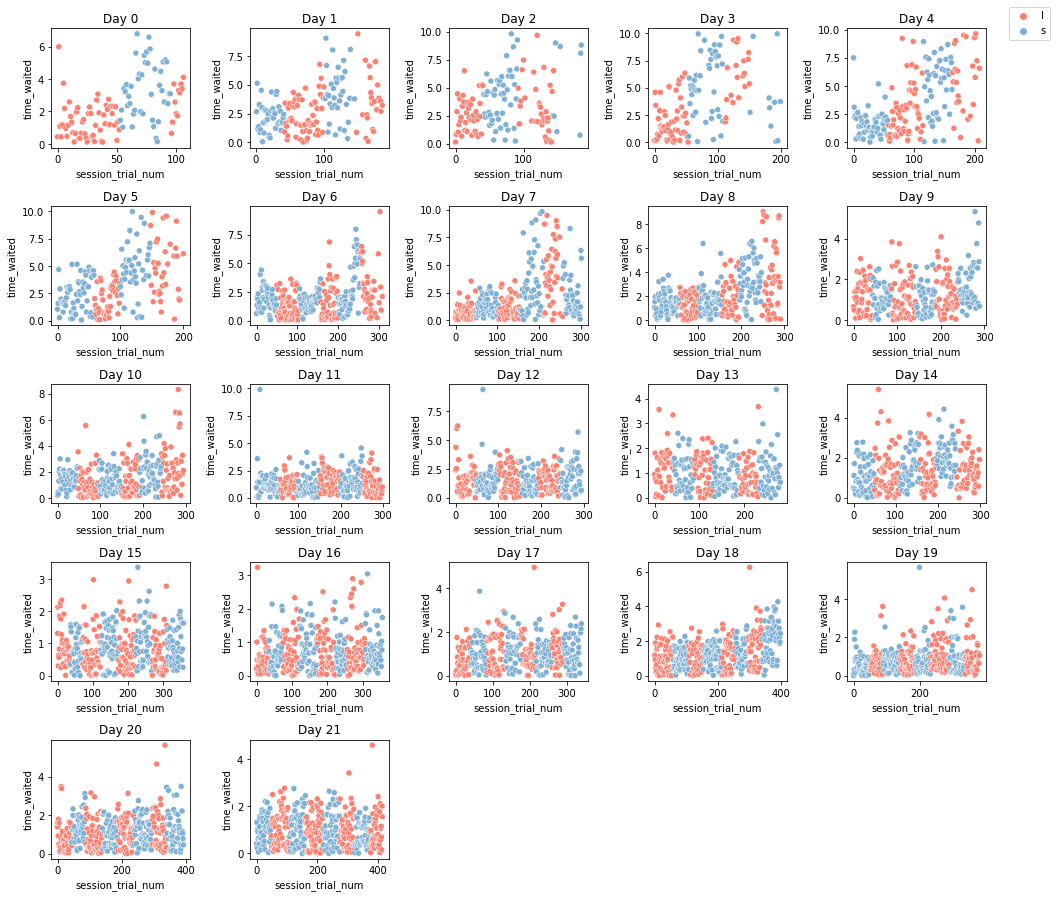

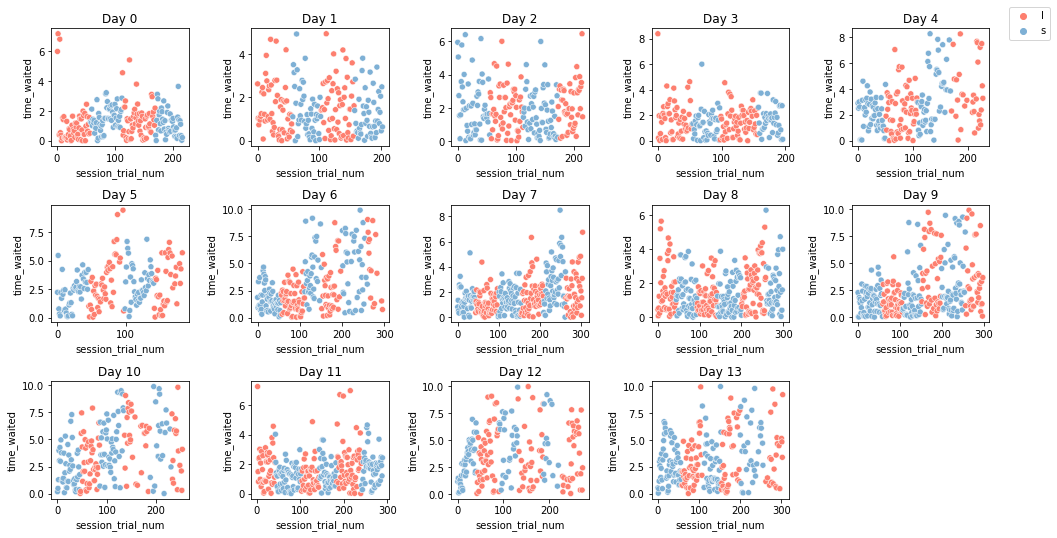

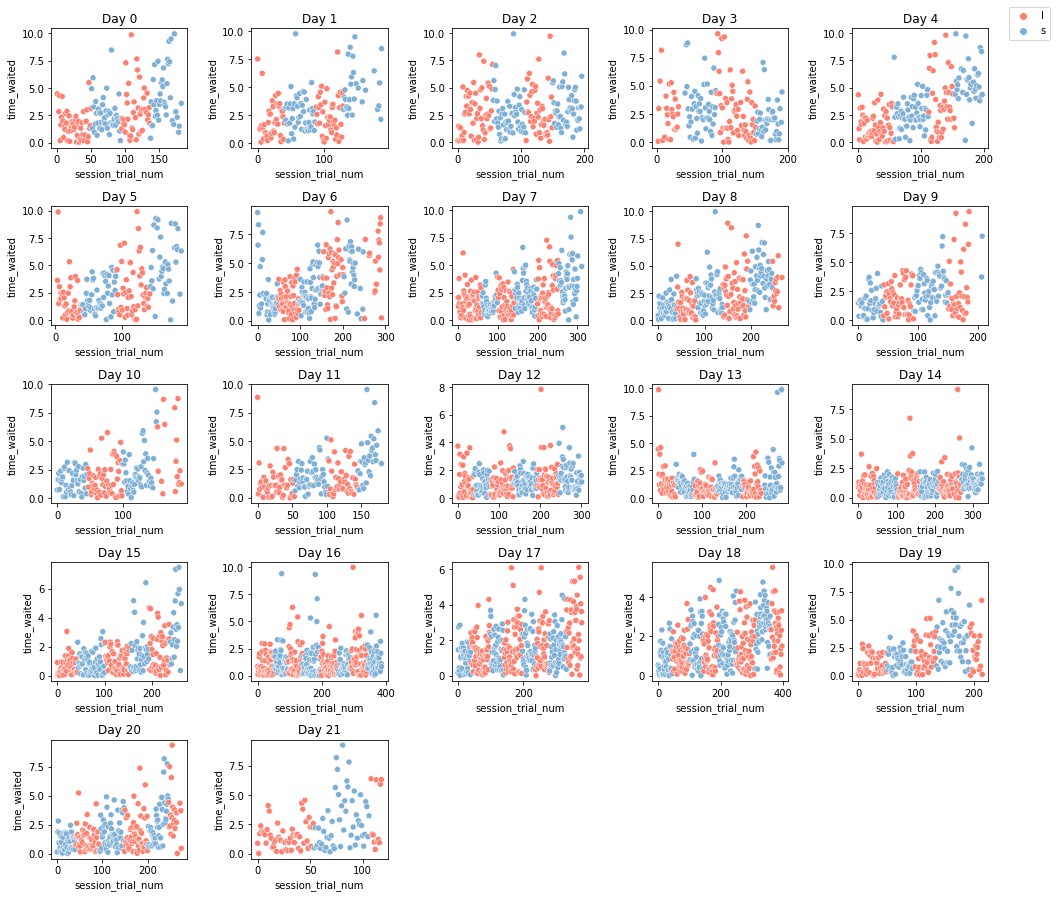

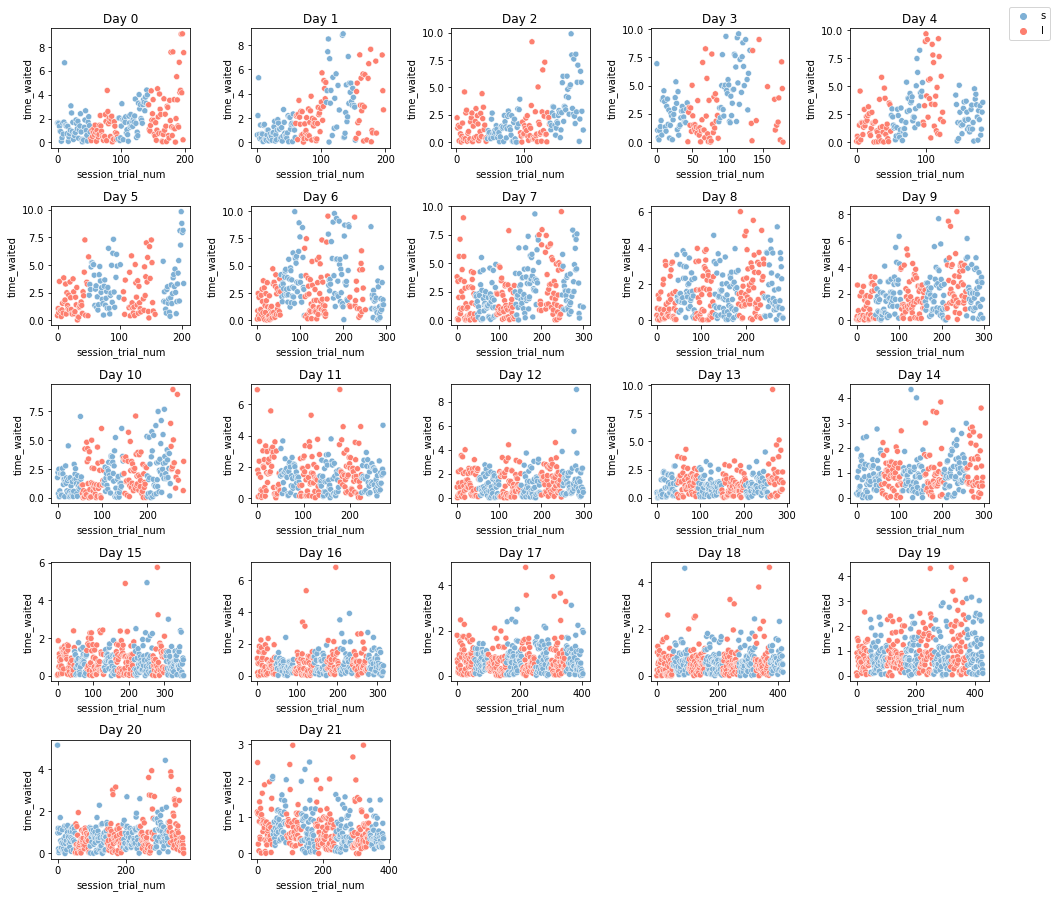

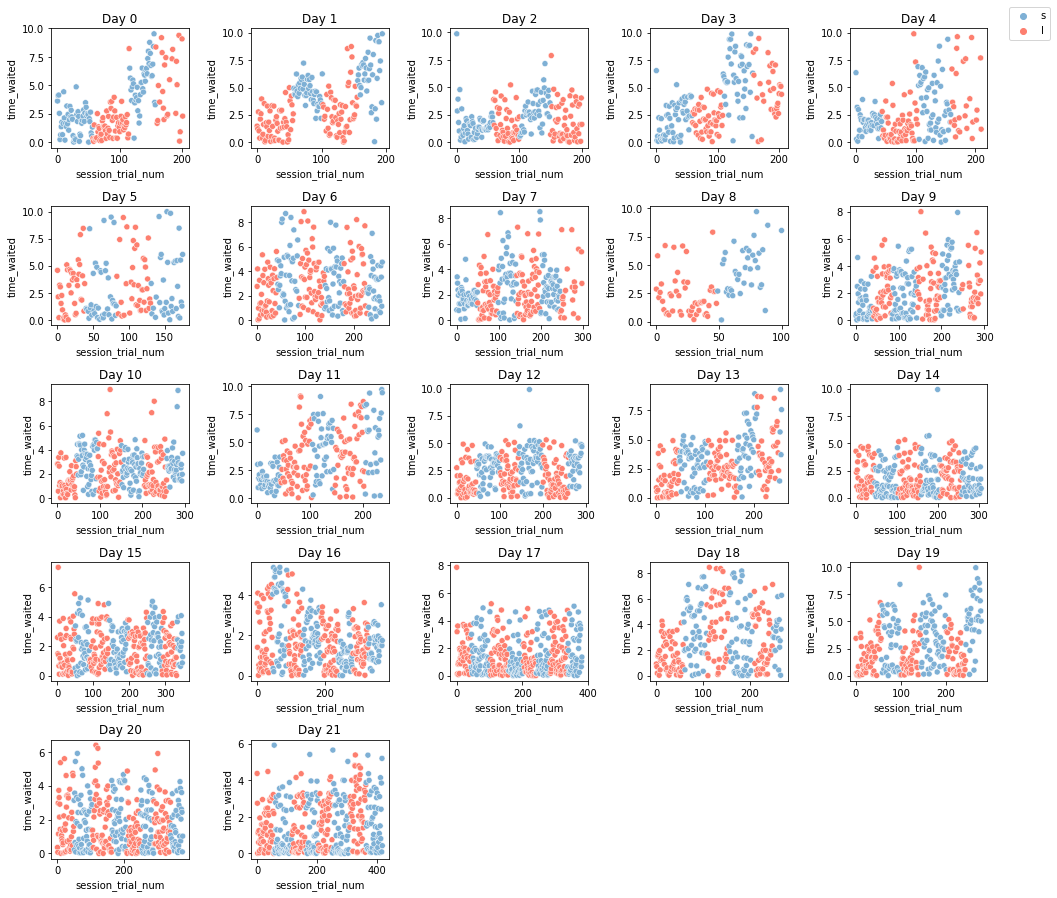

In [46]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[0], 's': colors[1]}
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

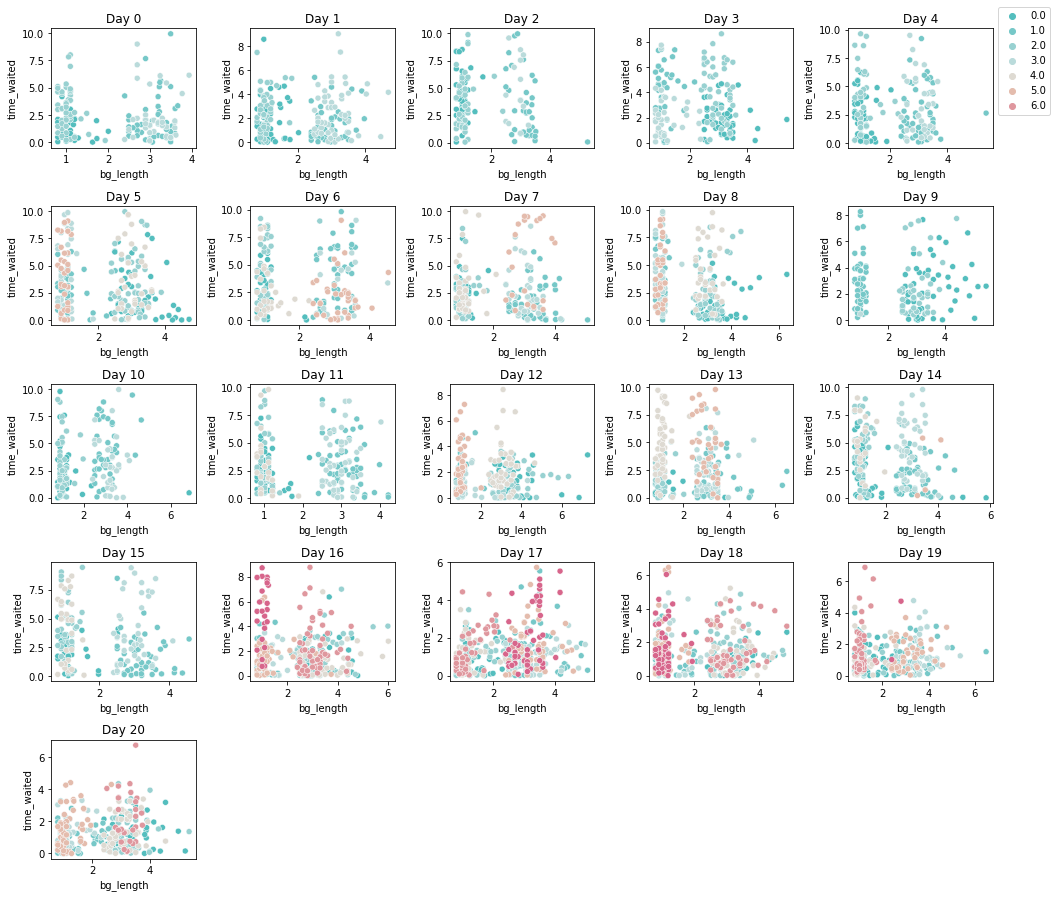

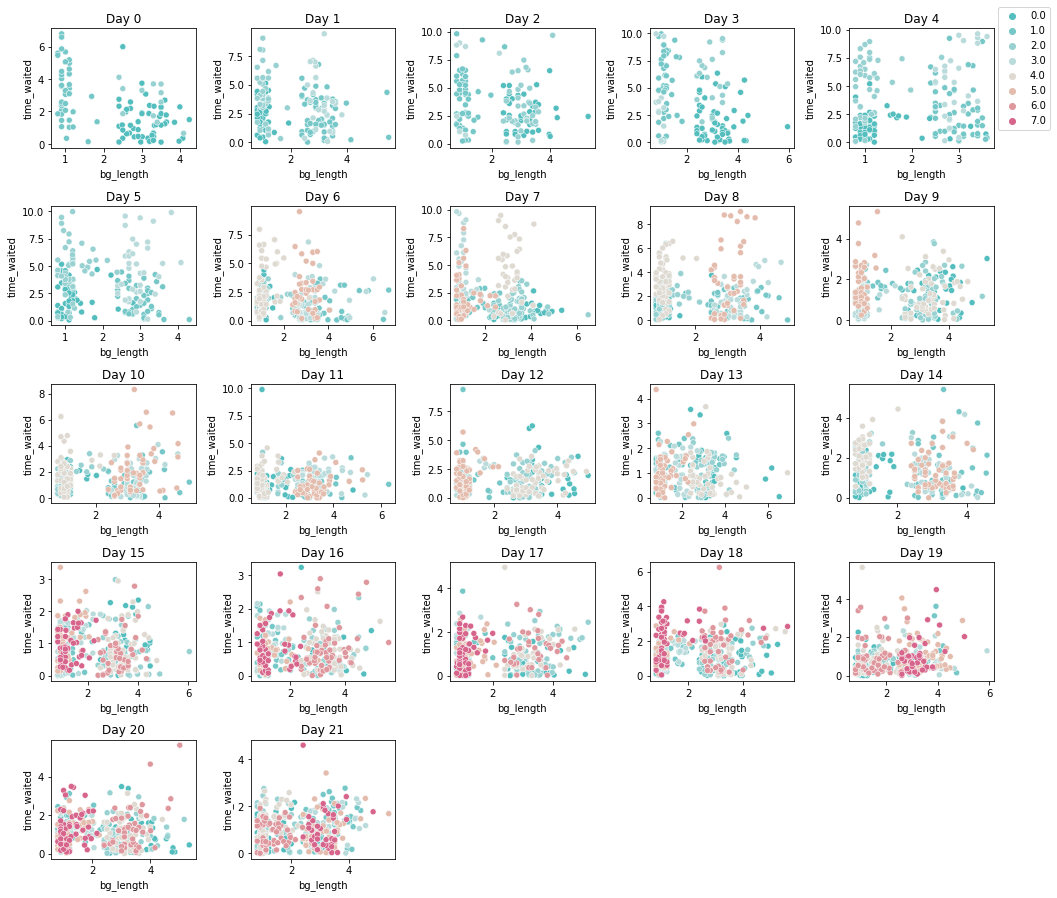

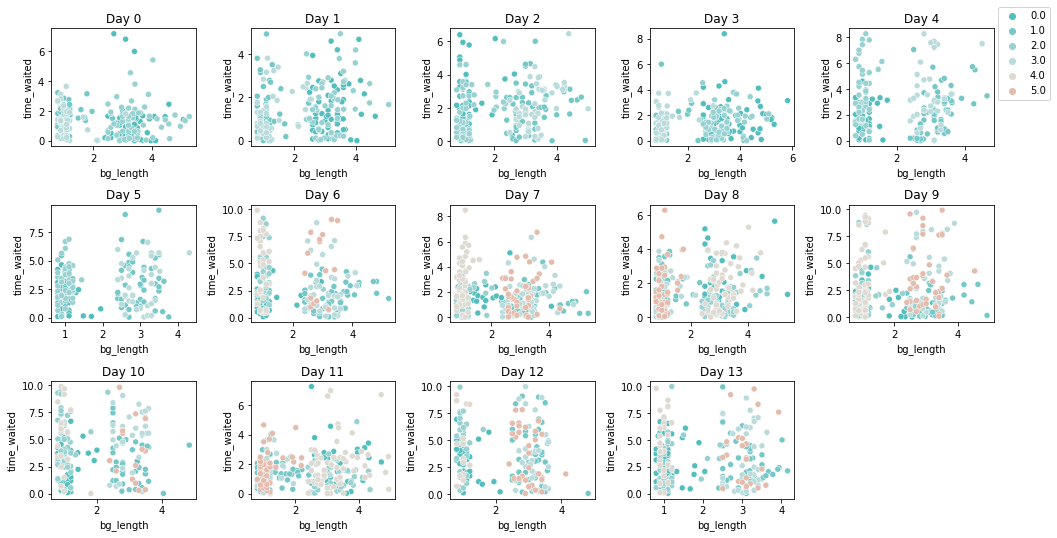

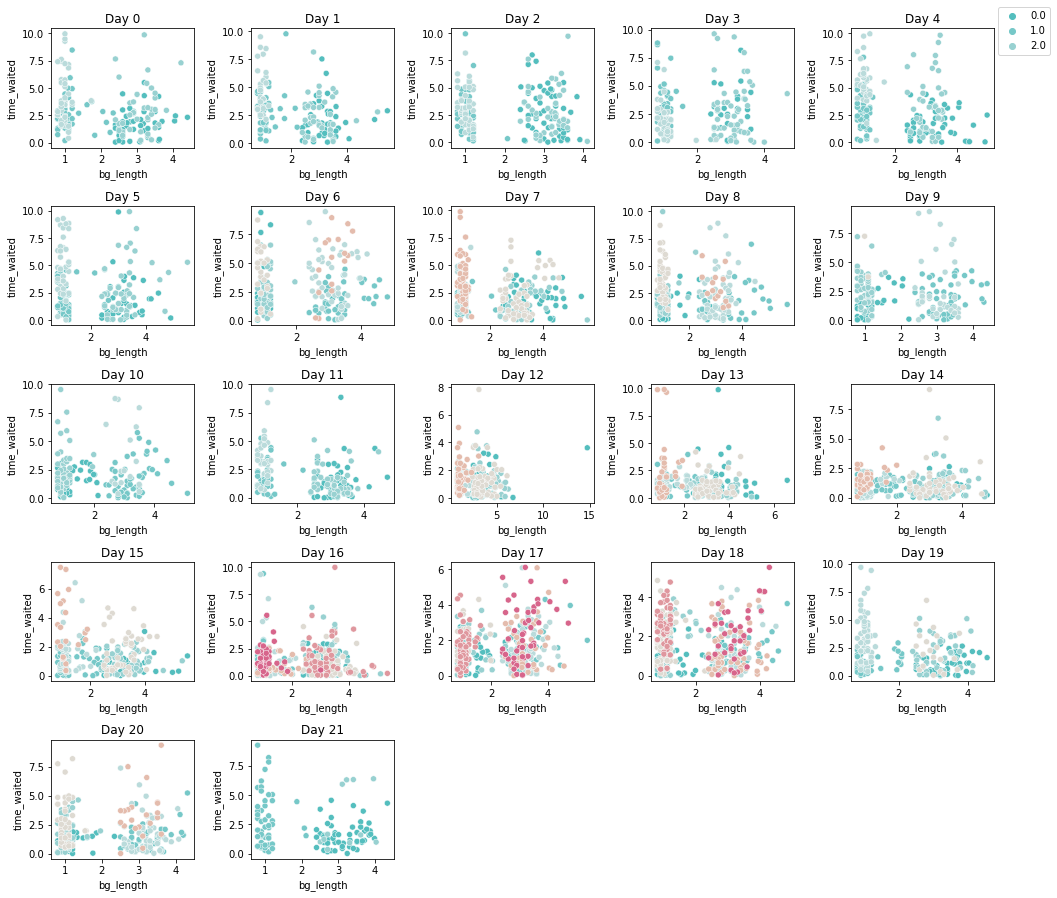

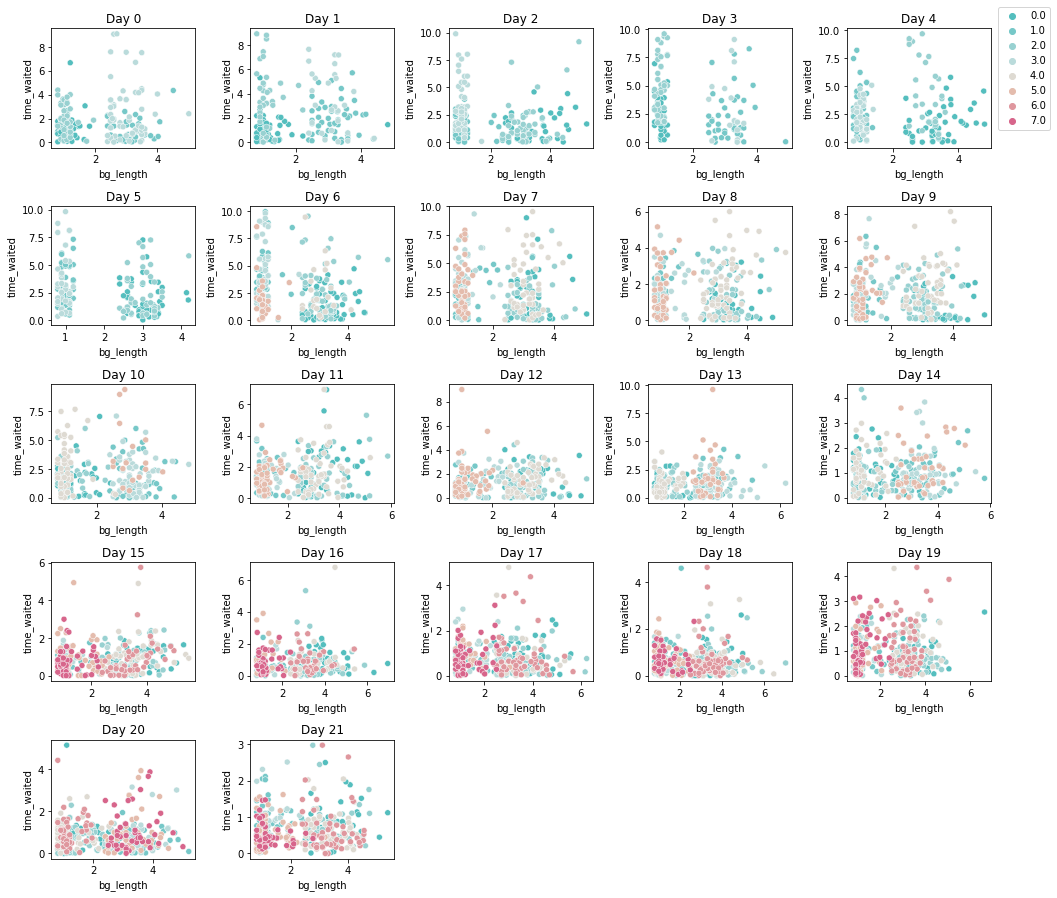

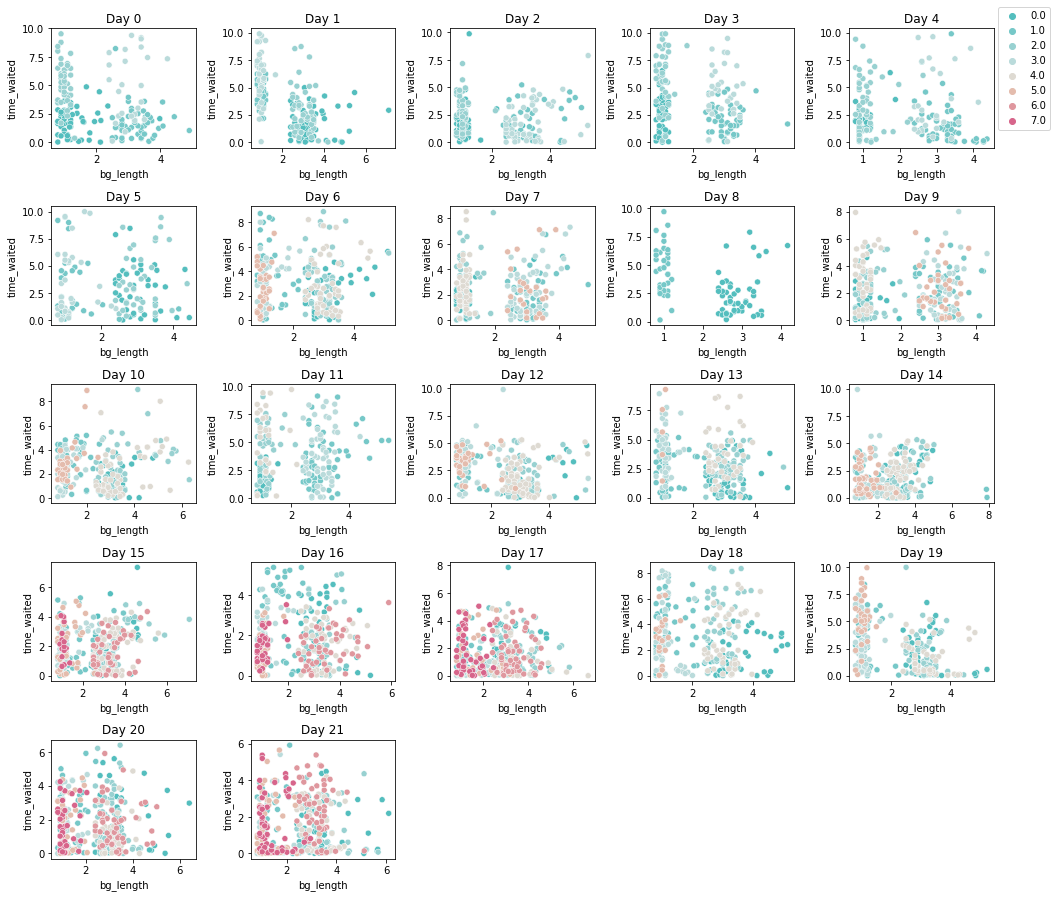

In [47]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {0: continuous_colors[0], 1: continuous_colors[1], 
                          2: continuous_colors[2], 3: continuous_colors[3],
                          4: continuous_colors[4], 5: continuous_colors[5], 
                          6: continuous_colors[6], 7: continuous_colors[7]}
        
        sns.scatterplot(x="bg_length",
                        y="time_waited",
                        hue="block_num",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')
        handles, labels = ax.get_legend_handles_labels()
    
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'bg_vs_tw_blk_{mouse}.png', bbox_inches='tight', dpi=300)


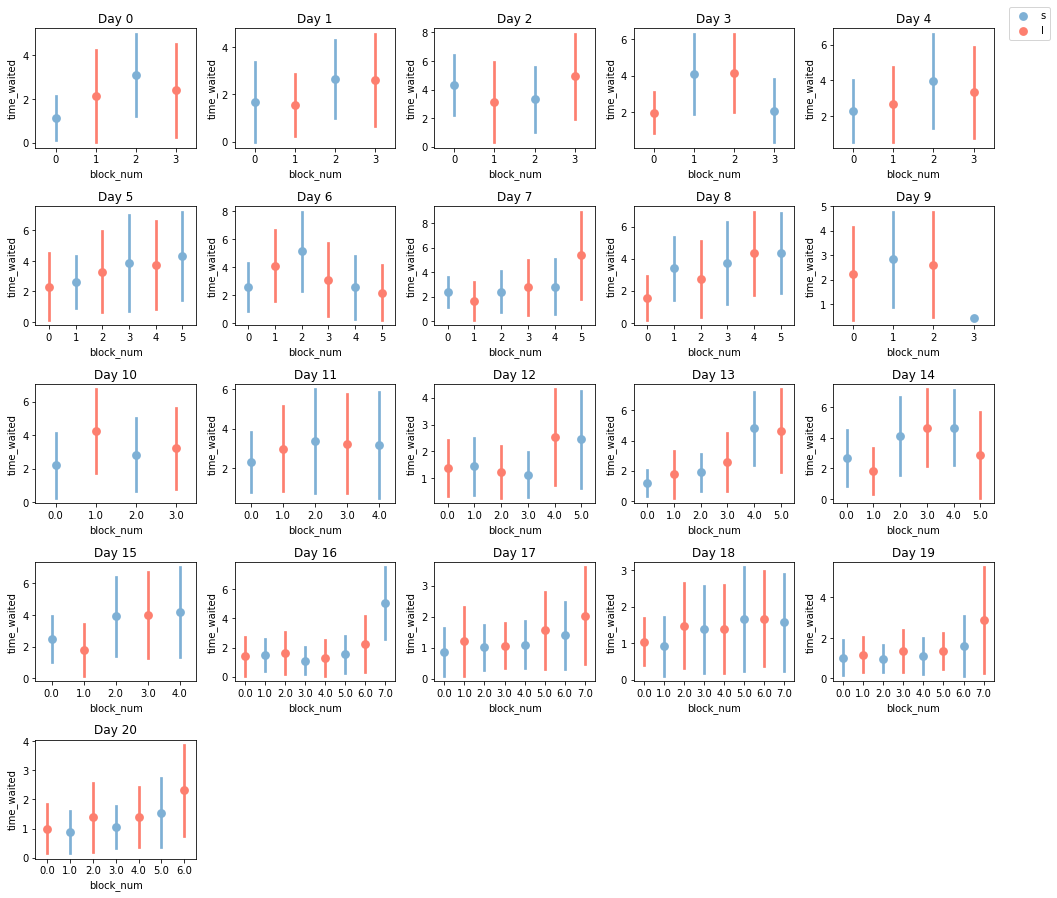

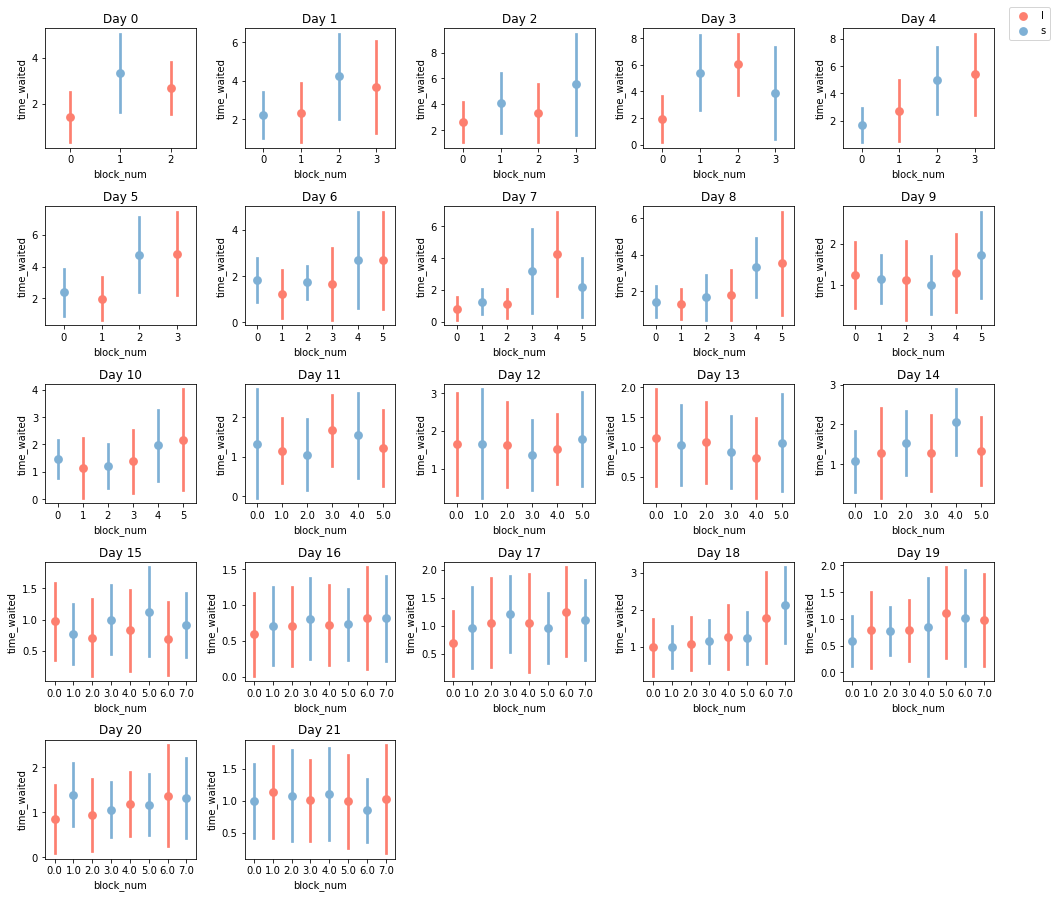

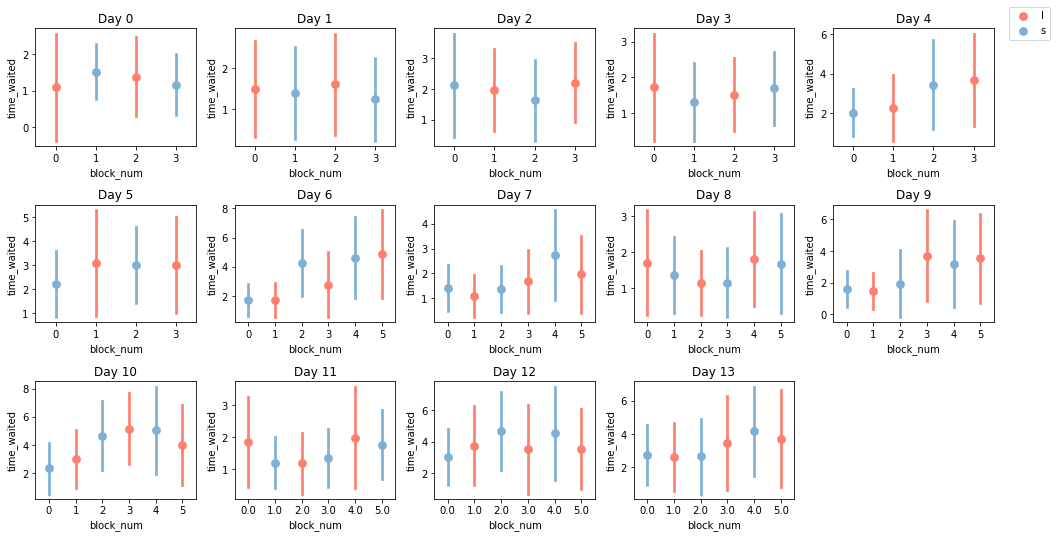

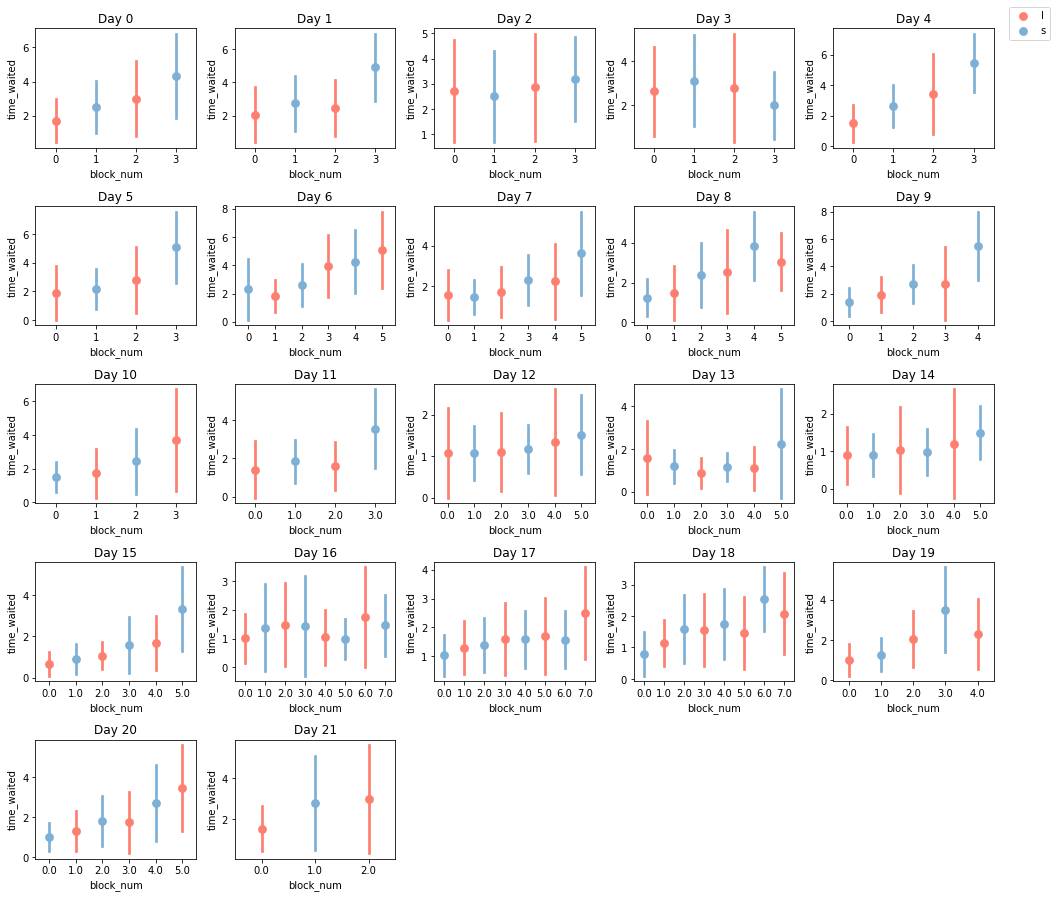

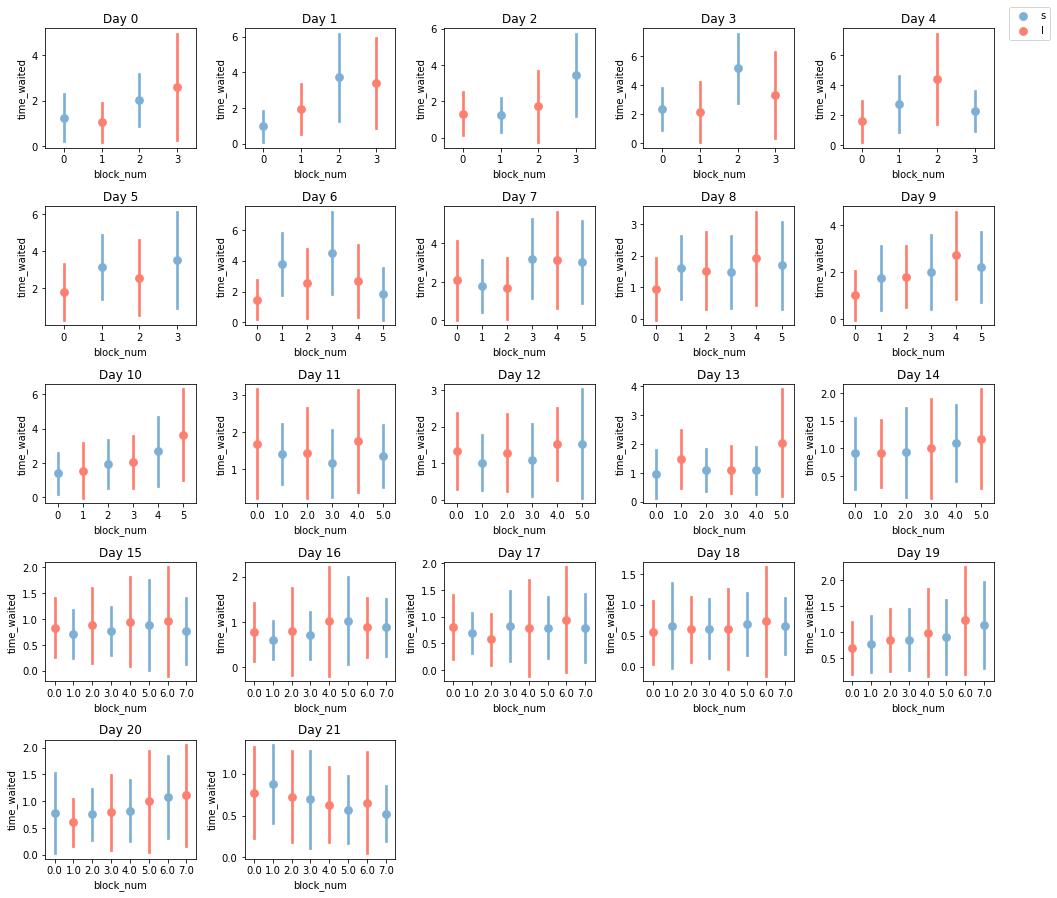

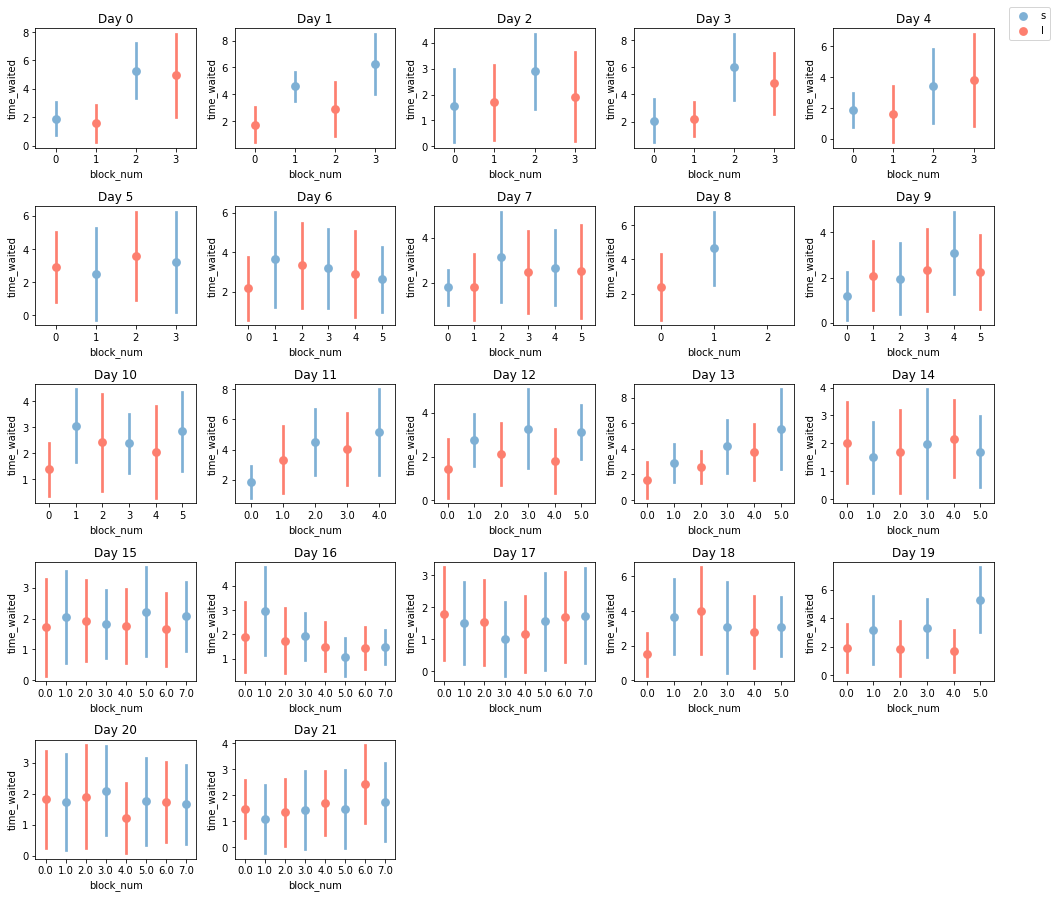

In [77]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[0], 's': colors[1]}
        
        sns.pointplot(x="block_num",
                        y="time_waited",
                        errorbar='sd',
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'trial_num_vs_tw_pointplot_{mouse}.png', bbox_inches='tight', dpi=300)

In [78]:
to_load = training_session_log.loc[(training_session_log.days == 15) & (training_session_log.mouse == 'RZ016')]
dir_name = to_load.dir.tolist()[0]
num_blocks = to_load.num_blocks.tolist()[0]

In [79]:
session = utils.load_all_trials_analyzed(data_folder, dir_name)
session_trimmed = session[session.block_num.between(1, num_blocks-1)].copy()

In [80]:
custom_palette = {'s': colors[0], 'l': colors[1]}

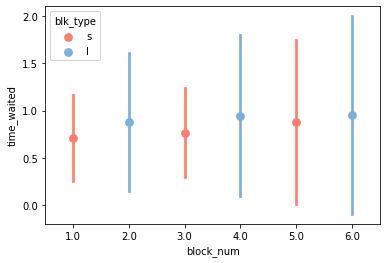

In [81]:
fig = plt.figure()
sns.pointplot(x="block_num", 
              y="time_waited", 
              errorbar='sd', 
              hue="blk_type", 
              data=session_trimmed, 
              palette=custom_palette)
plt.show()

In [88]:
session_no_accident = session_trimmed[session_trimmed.time_waited > 0.5]

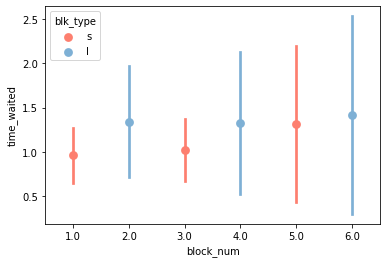

In [89]:
fig = plt.figure()
sns.pointplot(x="block_num", 
              y="time_waited", 
              errorbar='sd', 
              hue="blk_type", 
              data=session_no_accident, 
              palette=custom_palette)
plt.show()

In [95]:
long = session_trimmed[session_trimmed.blk_type == 'l']
short = session_trimmed[session_trimmed.blk_type == 's']
test = scipy.stats.ttest_ind(long['time_waited'], short['time_waited'])

In [97]:
test[1]

0.20381363224582968

In [82]:
blk = session_trimmed[session_trimmed.block_num == 1]

<AxesSubplot: xlabel='time_waited', ylabel='Density'>

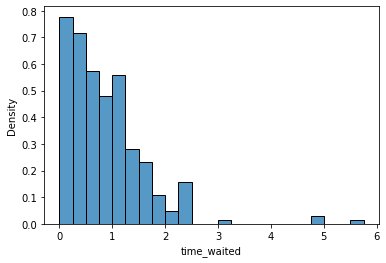

In [85]:
fig = plt.figure()
sns.histplot(data=session_trimmed, x="time_waited", stat="density")

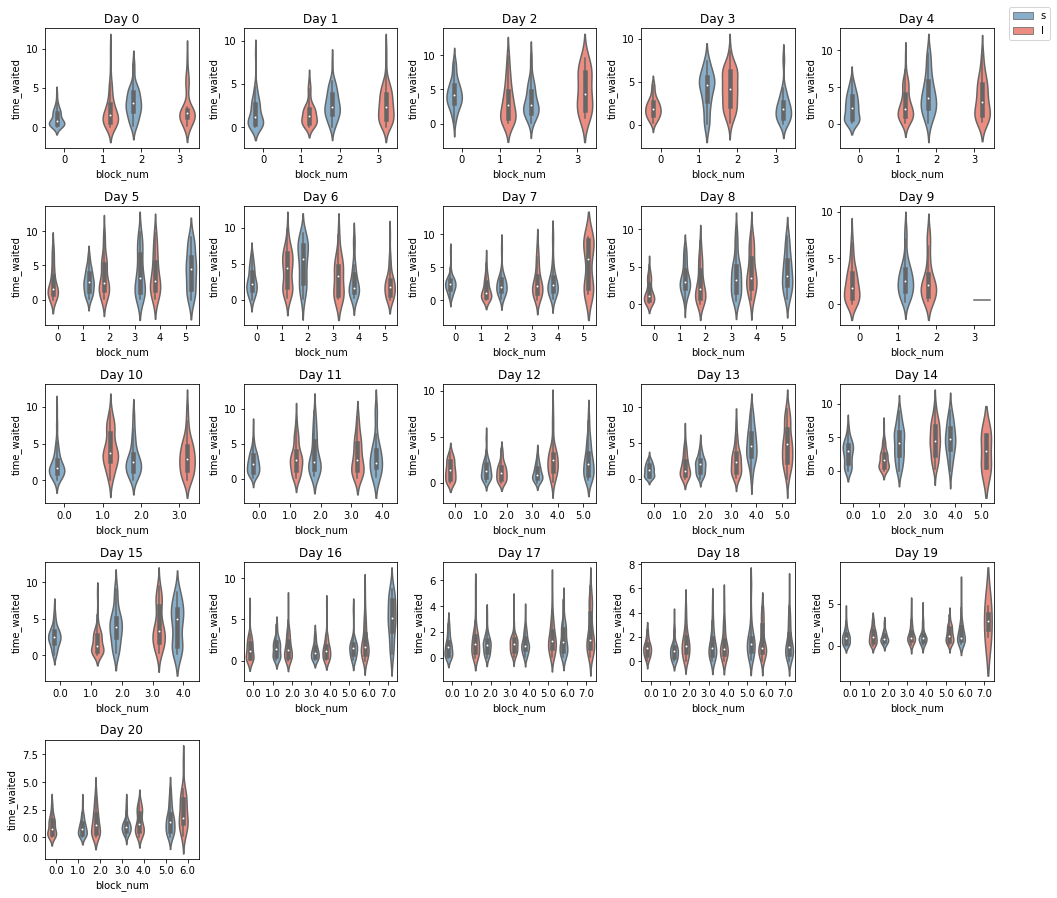

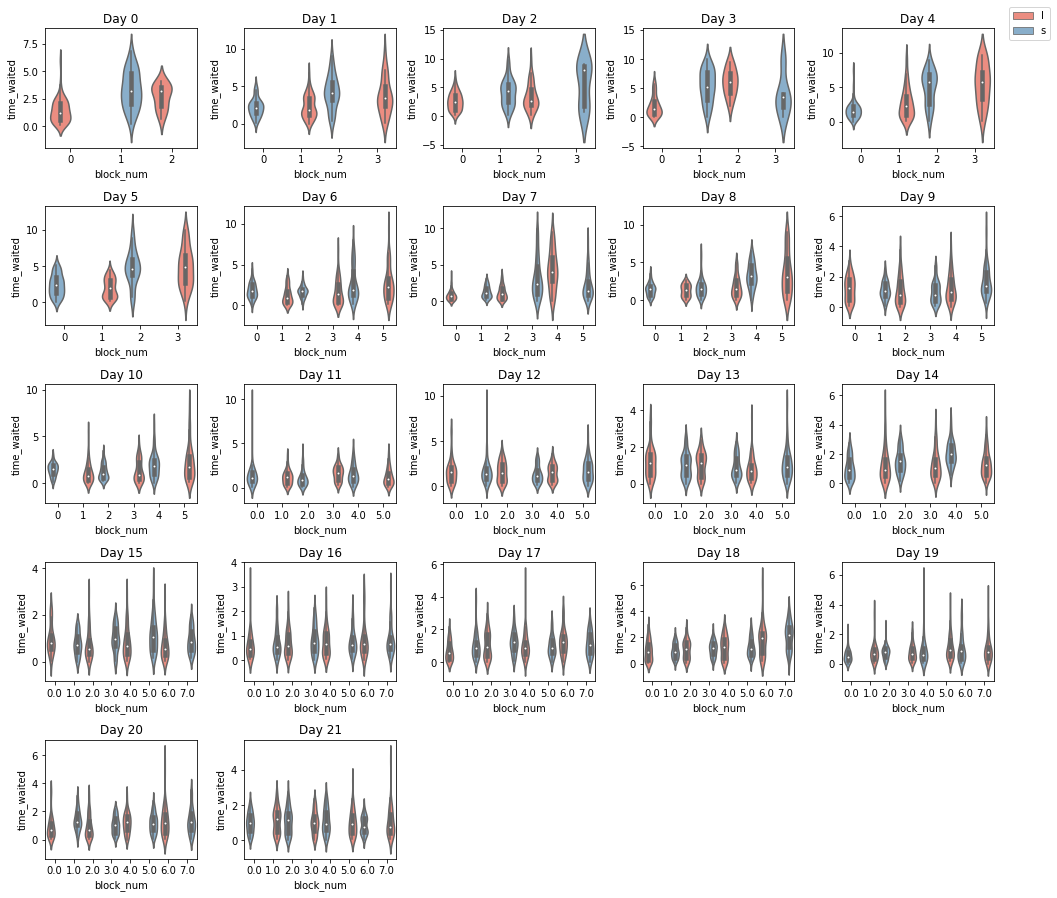

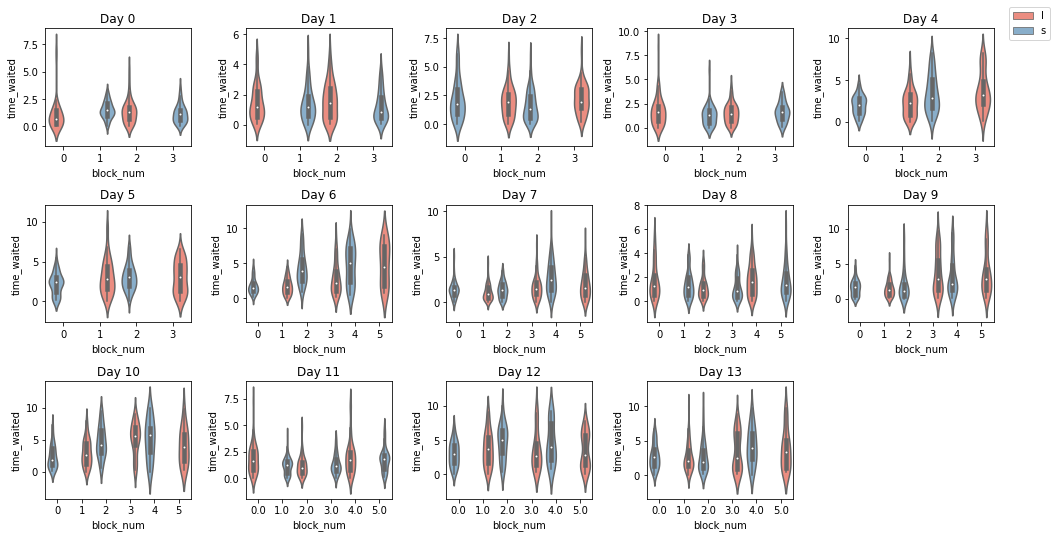

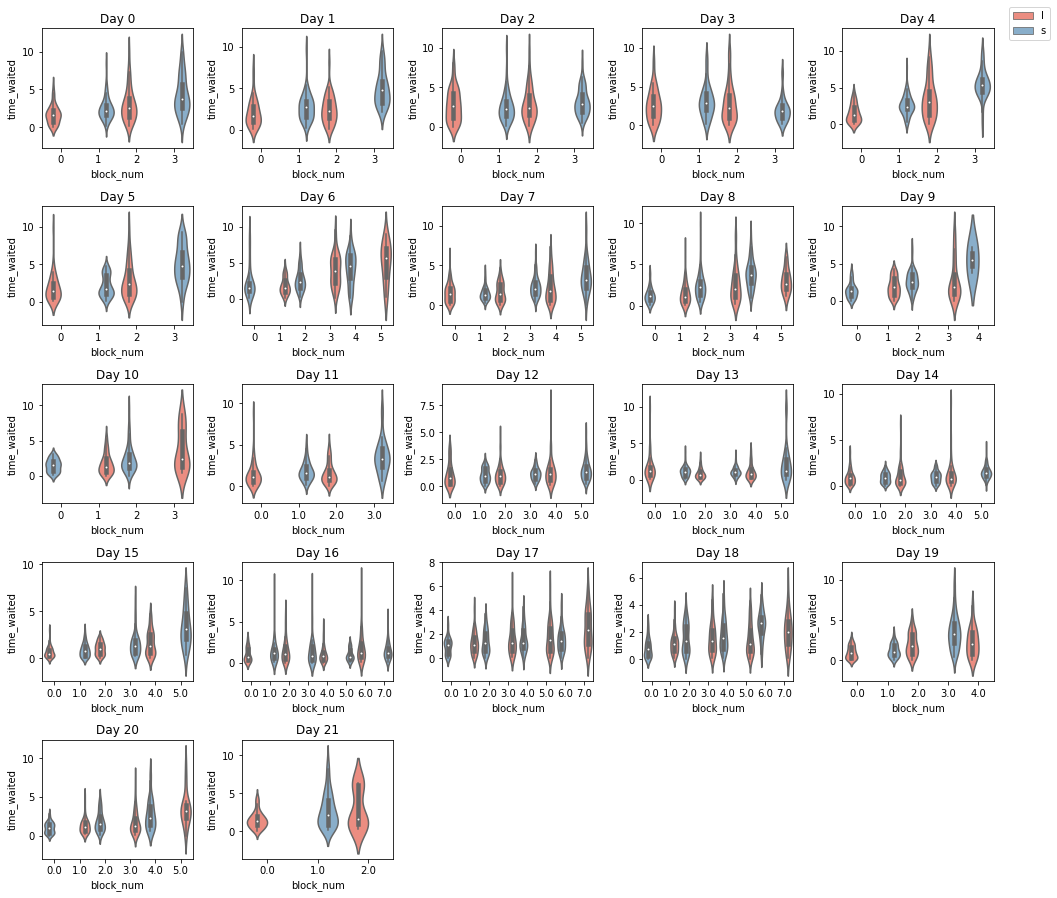

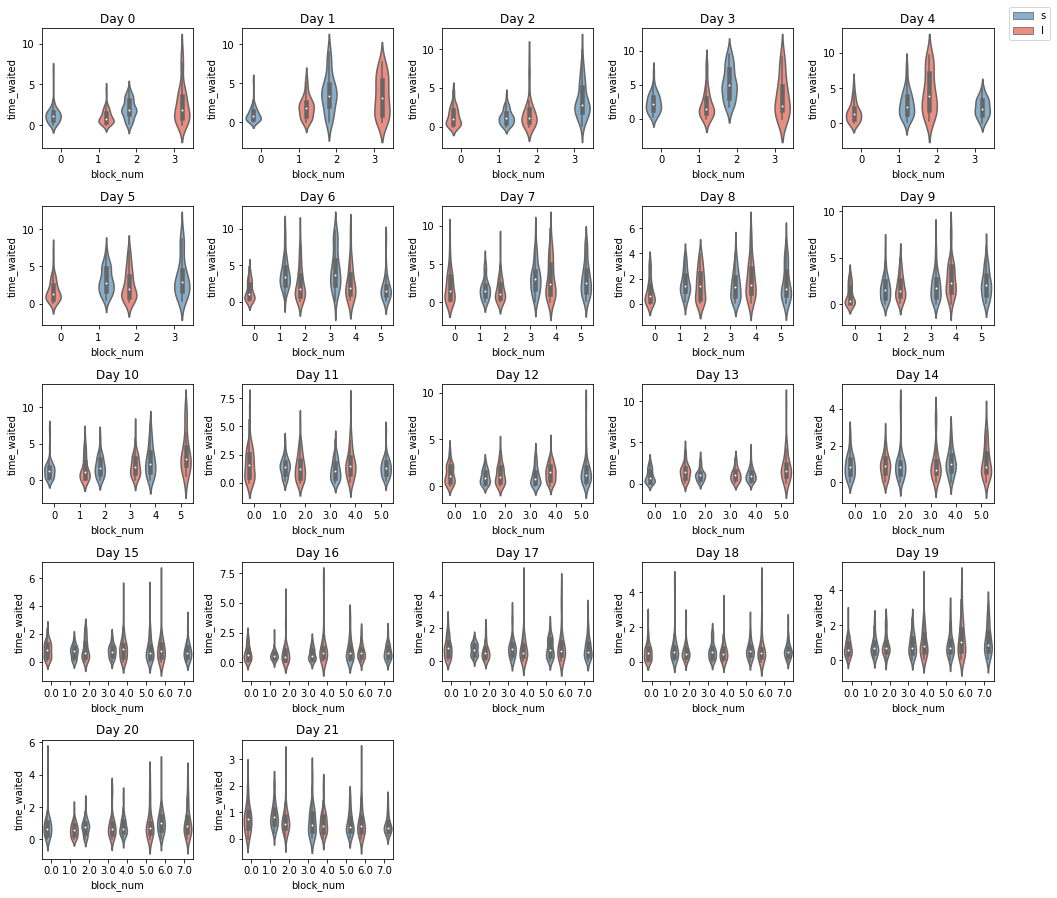

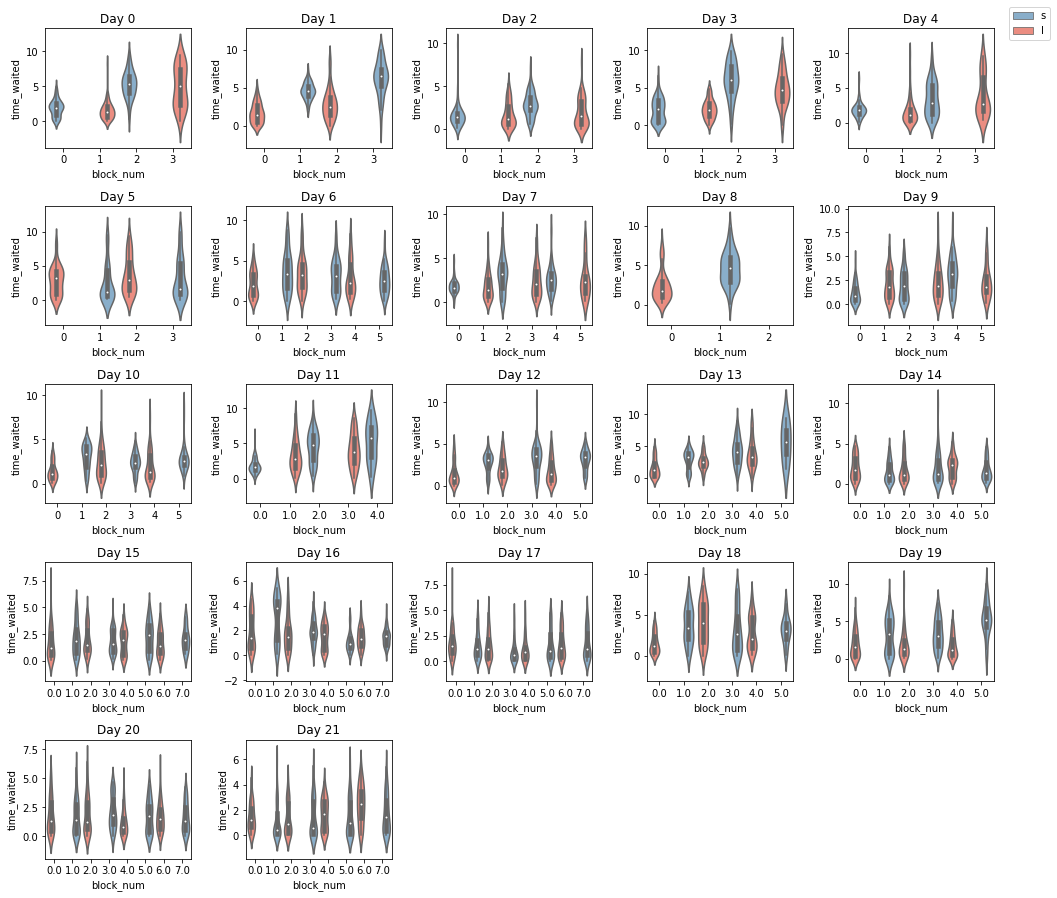

In [51]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[0], 's': colors[1]}
        
        sns.violinplot(x="block_num",
                        y="time_waited",
                        errorbar='sd',
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'trial_num_vs_tw_violinplot_{mouse}.png', bbox_inches='tight', dpi=300)

# Block based plotting

In [ ]:
def load_all_blocks(data_folder, dir_name):
    filename = f'{dir_name}_all_blocks.csv'
    path = os.path.join(data_folder, dir_name, filename)
    all_blocks_df = pd.read_csv(path)
    return all_blocks_df

In [ ]:
def get_session_performance(all_trials):
    num_miss_trials = all_trials.miss_trial.sum()
    good_trials = all_trials.loc[(all_trials['miss_trial'] == False) & (all_trials['enl_repeats'] == 1)]
    num_good_trials = len(good_trials)
    return [num_miss_trials, num_good_trials]

In [ ]:
block = load_all_blocks(data_folder, training_session_log.dir[57])

In [ ]:
block